# **HR Analysis Predicting Attrition**

by : Glen Valencius

In [3]:
# IMPORT SECTION

# ========================================
# 📌 DATA HANDLING & PROCESSING
# ========================================
import numpy as np
import pandas as pd
import regex as re
import pickle
import warnings

# Ignore warnings
warnings.filterwarnings("ignore")

# Pandas display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

# ========================================
# 📌 DATA PREPROCESSING & TRANSFORMERS
# ========================================
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder
from sklearn.compose import ColumnTransformer

# ========================================
# 📌 DATA SPLITTING & PIPELINES
# ========================================
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline  # For imbalanced datasets

# ========================================
# 📌 RESAMPLING TECHNIQUES
# ========================================
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# ========================================
# 📌 MACHINE LEARNING MODELS
# ========================================
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,
    VotingClassifier, StackingClassifier, BaggingClassifier, AdaBoostClassifier
)
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier

# ========================================
# 📌 MODEL EVALUATION & METRICS
# ========================================
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, fbeta_score,
    make_scorer, classification_report, confusion_matrix, precision_recall_curve
)

# ========================================
# 📌 STATISTICAL ANALYSIS
# ========================================
from scipy.stats import normaltest, chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# ========================================
# 📌 CLUSTERING & DIMENSIONALITY REDUCTION
# ========================================
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

# ========================================
# 📌 EXPLAINABILITY & FEATURE IMPORTANCE
# ========================================
import shap
import lime
from lime import lime_tabular
from lime.lime_tabular import LimeTabularExplainer

# ========================================
# 📌 DATA VISUALIZATION
# ========================================
import matplotlib.pyplot as plt
import seaborn as sns


Dataset : [Kaggle](https://www.kaggle.com/datasets/anshika2301/hr-analytics-dataset/data)

# **0. Importing Data**

In [4]:
df = pd.read_csv("Dataset/HR_Analytics.csv")
df.shape

(1480, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1480 entries, 0 to 1479
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmpID                     1480 non-null   object 
 1   Age                       1480 non-null   int64  
 2   AgeGroup                  1480 non-null   object 
 3   Attrition                 1480 non-null   object 
 4   BusinessTravel            1480 non-null   object 
 5   DailyRate                 1480 non-null   int64  
 6   Department                1480 non-null   object 
 7   DistanceFromHome          1480 non-null   int64  
 8   Education                 1480 non-null   int64  
 9   EducationField            1480 non-null   object 
 10  EmployeeCount             1480 non-null   int64  
 11  EmployeeNumber            1480 non-null   int64  
 12  EnvironmentSatisfaction   1480 non-null   int64  
 13  Gender                    1480 non-null   object 
 14  HourlyRa

In [6]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

Column Name  Number of Unique  \
0                      EmpID              1470   
1                        Age                43   
2                   AgeGroup                 5   
3                  Attrition                 2   
4             BusinessTravel                 4   
5                  DailyRate               886   
6                 Department                 3   
7           DistanceFromHome                29   
8                  Education                 5   
9             EducationField                 6   
10             EmployeeCount                 1   
11            EmployeeNumber              1470   
12   EnvironmentSatisfaction                 4   
13                    Gender                 2   
14                HourlyRate                71   
15            JobInvolvement                 4   
16                  JobLevel                 5   
17                   JobRole                 9   
18           JobSatisfaction                 4   
19             MaritalStatus                 3   
20             MonthlyIncome              1349   
21                SalarySlab                 4   
22               MonthlyRate              1427   
23        NumCompaniesWorked                10   
24                    Over18                 1   
25                  OverTime                 2   
26         PercentSalaryHike                15   
27         PerformanceRating                 2   
28  RelationshipSatisfaction                 4   
29             StandardHours                 1   
30          StockOptionLevel                 4   
31         TotalWorkingYears                40   
32     TrainingTimesLastYear                 7   
33           WorkLifeBalance                 4   
34            YearsAtCompany                37   
35        YearsInCurrentRole                19   
36   YearsSinceLastPromotion                16   
37      YearsWithCurrManager                18   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Unique Sample  
0   [RM297, RM302, RM458, RM728, RM829, RM973, RM1154, RM1312, RM128, RM150, RM172, RM178, RM423, RM689, RM854, RM893, RM910, RM103, RM488, RM514, RM663, RM690, RM732, RM777, RM857, RM877, RM1179, RM1198, RM024, RM275, RM358, RM363, RM371, RM497, RM664, RM778, RM816, RM916, RM1153, RM1272, RM1437, RM018, RM110, RM129, RM161, RM207, RM384, RM444, RM499, RM631, RM667, RM735, RM861, RM1138, RM1274, RM1340, RM1424, RM087, RM346, RM517, RM551, RM566, RM586, RM911, RM1083, RM1128, RM1202, RM1214, RM1239, RM1409, RM1439, RM021, RM035, RM097, RM114, RM381, RM415, RM471, RM475, RM477, RM480, RM526, RM587, RM641, RM725, RM842, RM872, RM1026, RM1061, RM1062, RM1098, RM1169, RM1218, RM1223, RM1231, RM1246, RM1408, RM108, RM109, RM139, ...]  
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    [18, 19, 20, 21, 22, 

# **1. Cleaning**

## 1.1. Duplicated Data

In [7]:
print(f'''Total Duplicated Data : {df.duplicated().sum()}''')

Total Duplicated Data : 7


In [8]:
df[df.duplicated()]

EmpID  Age AgeGroup Attrition     BusinessTravel  DailyRate  \
211   RM1468   27    26-35        No      Travel_Rarely        155   
328   RM1461   29    26-35        No      Travel_Rarely        468   
458   RM1464   31    26-35        No         Non-Travel        325   
655   RM1470   34    26-35        No       TravelRarely        628   
954   RM1463   39    36-45        No      Travel_Rarely        722   
1305  RM1469   49    46-55        No  Travel_Frequently       1023   
1336  RM1462   50    46-55       Yes      Travel_Rarely        410   

                  Department  DistanceFromHome  Education EducationField  \
211   Research & Development                 4          3  Life Sciences   
328   Research & Development                28          4        Medical   
458   Research & Development                 5          3        Medical   
655   Research & Development                 8          3        Medical   
954                    Sales                24          1      Marketing   
1305                   Sales                 2          3        Medical   
1336                   Sales                28          3      Marketing   

      EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  \
211               1            2064                        2    Male   
328               1            2054                        4  Female   
458               1            2057                        2    Male   
655               1            2068                        2    Male   
954               1            2056                        2  Female   
1305              1            2065                        4    Male   
1336              1            2055                        4    Male   

      HourlyRate  JobInvolvement  JobLevel                 JobRole  \
211           87               4         2  Manufacturing Director   
328           73               2         1      Research Scientist   
458           74               3         2  Manufacturing Director   
655           82               4         2   Laboratory Technician   
954           60               2         4         Sales Executive   
1305          63               2         2         Sales Executive   
1336          39               2         3         Sales Executive   

      JobSatisfaction MaritalStatus  MonthlyIncome SalarySlab  MonthlyRate  \
211                 2       Married           6142     5k-10k         5174   
328                 1        Single           3785    Upto 5k         8489   
458                 1        Single           9936     5k-10k         3787   
655                 3       Married           4404    Upto 5k        10228   
954                 4       Married          12031    10k-15k         8828   
1305                2       Married           5390     5k-10k        13243   
1336                1      Divorced          10854    10k-15k        16586   

      NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
211                    1      Y      Yes                 20   
328                    1      Y       No                 14   
458                    0      Y       No                 19   
655                    2      Y       No                 12   
954                    0      Y       No                 11   
1305                   2      Y       No                 14   
1336                   4      Y      Yes                 13   

      PerformanceRating  RelationshipSatisfaction  StandardHours  \
211                   4                         2             80   
328                   3                         2             80   
458                   3                         2             80   
655                   3                         1             80   
954                   3                         1             80   
1305                  3                         4             80   
1336                  3                         2             80   

      StockOptionLevel  

We will drop the duplicate because it's all the same

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape[0]

1473

## 1.2. NaN Column

In [9]:
df.isna().sum().sort_values()

EmpID                        0
SalarySlab                   0
MonthlyRate                  0
NumCompaniesWorked           0
Over18                       0
OverTime                     0
PercentSalaryHike            0
PerformanceRating            0
RelationshipSatisfaction     0
StandardHours                0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
MonthlyIncome                0
MaritalStatus                0
JobSatisfaction              0
JobRole                      0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
YearsSinceLastPromotion      0
Education                    0
EmployeeCount                0
EmployeeNumber               0
EnvironmentSatisfaction      0
Gender  

In [10]:
df[(df['YearsWithCurrManager'].isna())].head()

EmpID  Age AgeGroup Attrition BusinessTravel  DailyRate  \
28   RM024   21    18-25        No  Travel_Rarely        391   
31   RM363   21    18-25        No     Non-Travel        895   
45   RM207   22    18-25        No  Travel_Rarely       1136   
99   RM139   25    18-25        No  Travel_Rarely        959   
100  RM256   25    18-25        No  Travel_Rarely        685   

                 Department  DistanceFromHome  Education EducationField  \
28   Research & Development                15          2  Life Sciences   
31                    Sales                 9          2        Medical   
45   Research & Development                 5          3  Life Sciences   
99                    Sales                28          3  Life Sciences   
100  Research & Development                 1          3  Life Sciences   

     EmployeeCount  EmployeeNumber  EnvironmentSatisfaction  Gender  \
28               1              30                        3    Male   
31               1             484                        1    Male   
45               1             284                        4    Male   
99               1             183                        1    Male   
100              1             350                        1  Female   

     HourlyRate  JobInvolvement  JobLevel                 JobRole  \
28           96               3         1      Research Scientist   
31           39               3         1    Sales Representative   
45           60               4         1      Research Scientist   
99           41               2         2         Sales Executive   
100          62               3         2  Manufacturing Director   

     JobSatisfaction MaritalStatus  MonthlyIncome SalarySlab  MonthlyRate  \
28                 4        Single           1232    Upto 5k        19281   
31                 4        Single           2610    Upto 5k         2851   
45                 2      Divorced           2328    Upto 5k        12392   
99                 3       Married           8639     5k-10k        24835   
100                3       Married           4898    Upto 5k         7505   

     NumCompaniesWorked Over18 OverTime  PercentSalaryHike  PerformanceRating  \
28                    1      Y       No                 14                  3   
31                    1      Y       No                 24                  4   
45                    1      Y      Yes                 16                  3   
99                    2      Y       No                 18                  3   
100                   0      Y       No                 12                  3   

     RelationshipSatisfaction  StandardHours  StockOptionLevel  \
28                          4             80                 0   
31                          3             80                 0   
45                          1             80                 1   
99                          4             80                 0   
100                         4             80                 2   

     TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
28                   0                      6                3   
31                   3                      3                2   
45                   4                      2                2   
99                   6                      3                3   
100                  5                      3                3   

     YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
28                0                   0                        0   
31                3                   2                        2   
45                4                   2                        2   
99                2                   2                        2   
100               4                   2                        1   

     YearsWithCurrManager  
28                    NaN  
31                    NaN  
45                    NaN  
99                    NaN  
100                   NaN

We will impute missing values in the *YearsWithCurrManager* column using the median. Since only 57 out of 1,480 records are missing, this imputation is unlikely to significantly impact the dataset, making it a suitable choice for our machine learning model.

In [11]:
df['YearsWithCurrManager'].median()

3.0

In [12]:
df.loc[df['YearsWithCurrManager'].isna(),'YearsWithCurrManager']=df['YearsWithCurrManager'].median()

## 1.3. Change Attrition to 1 and 0

In [13]:
df['Attrition'] = np.where(df['Attrition'] == 'Yes', 1, 0)

In [14]:
df['Attrition'].head()

0    1
1    0
2    1
3    0
4    1
Name: Attrition, dtype: int64

## 1.4. Dropping Column that doesn't matter

The columns *EmployeeCount*, *EmployeeNumber*, *Over18*, and *StandardHours* contain only a single unique value across all rows. Since they do not provide any variability, they will not contribute to the prediction and can be excluded from the analysis.

In [15]:
df['EmployeeCount'].unique()

array([1])

In [16]:
df['EmployeeNumber'].unique()

array([ 405,  411,  614, ...,  732, 1233, 1697])

In [17]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [18]:
df['StandardHours'].unique()

array([80])

In [19]:
df.drop(columns=['EmployeeCount', 'EmployeeNumber','Over18','StandardHours'],inplace=True)

## 1.5. Cleaning BusinessTravel Data

After further research, we got a data in BusinessTravel that the same but different way of writing, we will make it in the same

In [20]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel', 'TravelRarely'],
      dtype=object)

Travel_Rarely got 2 the same but different writing, so we will clean this

In [21]:
df.loc[df['BusinessTravel']=='TravelRarely','BusinessTravel'] = 'Travel_Rarely'

# **2. EDA**

We will see the data distribution and corelation between categorical and numerical to Attrition

## 2.1. Numerical Column

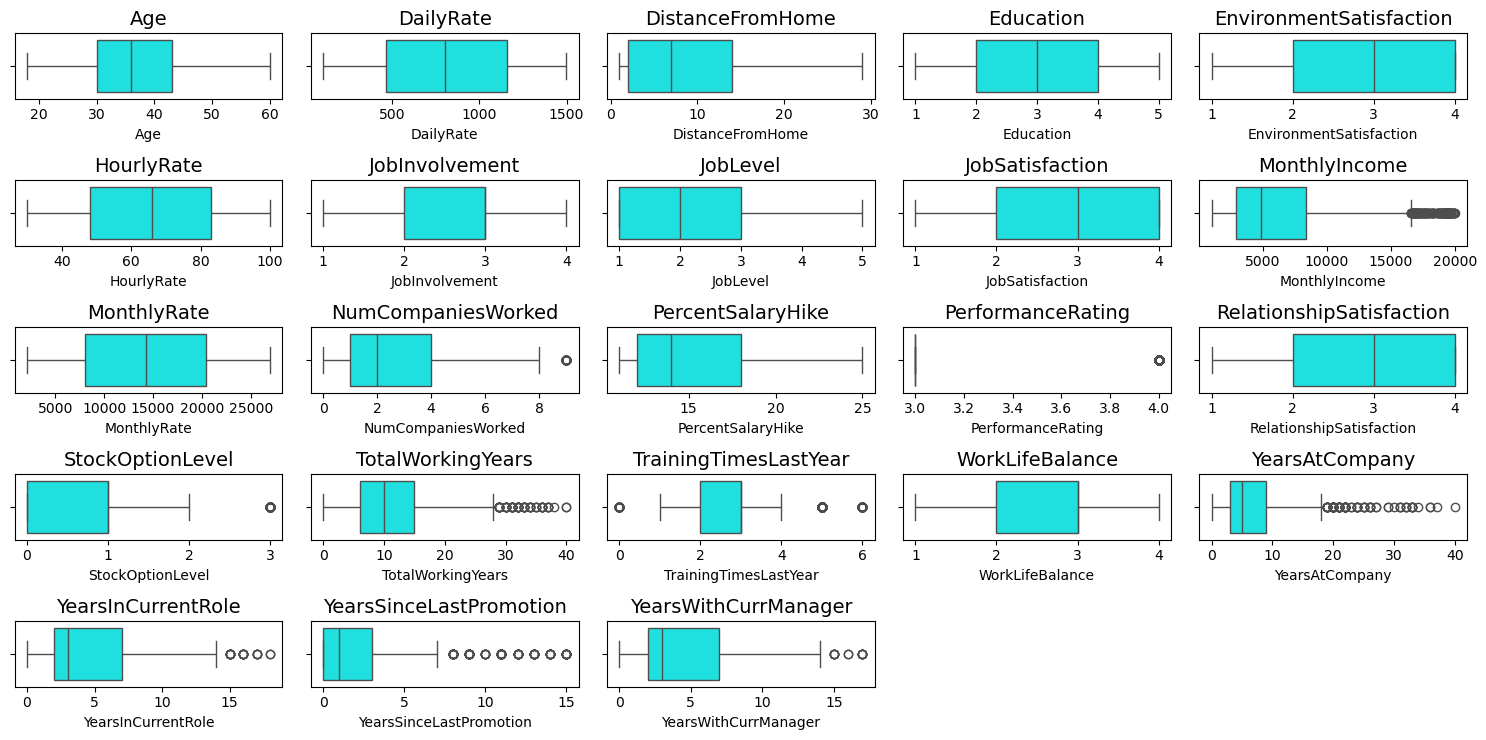

In [22]:
numerical_cols = df.drop(columns=['Attrition','EmpID']).select_dtypes(include=['number']).columns
numerical_cols

num_cols = 5
num_rows = int(np.ceil(len(numerical_cols) / num_cols))

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 7.5))


axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=df, x=col, ax=axes[i], color='cyan')
    axes[i].set_title(col, fontsize=14)

        
for ax in axes[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()

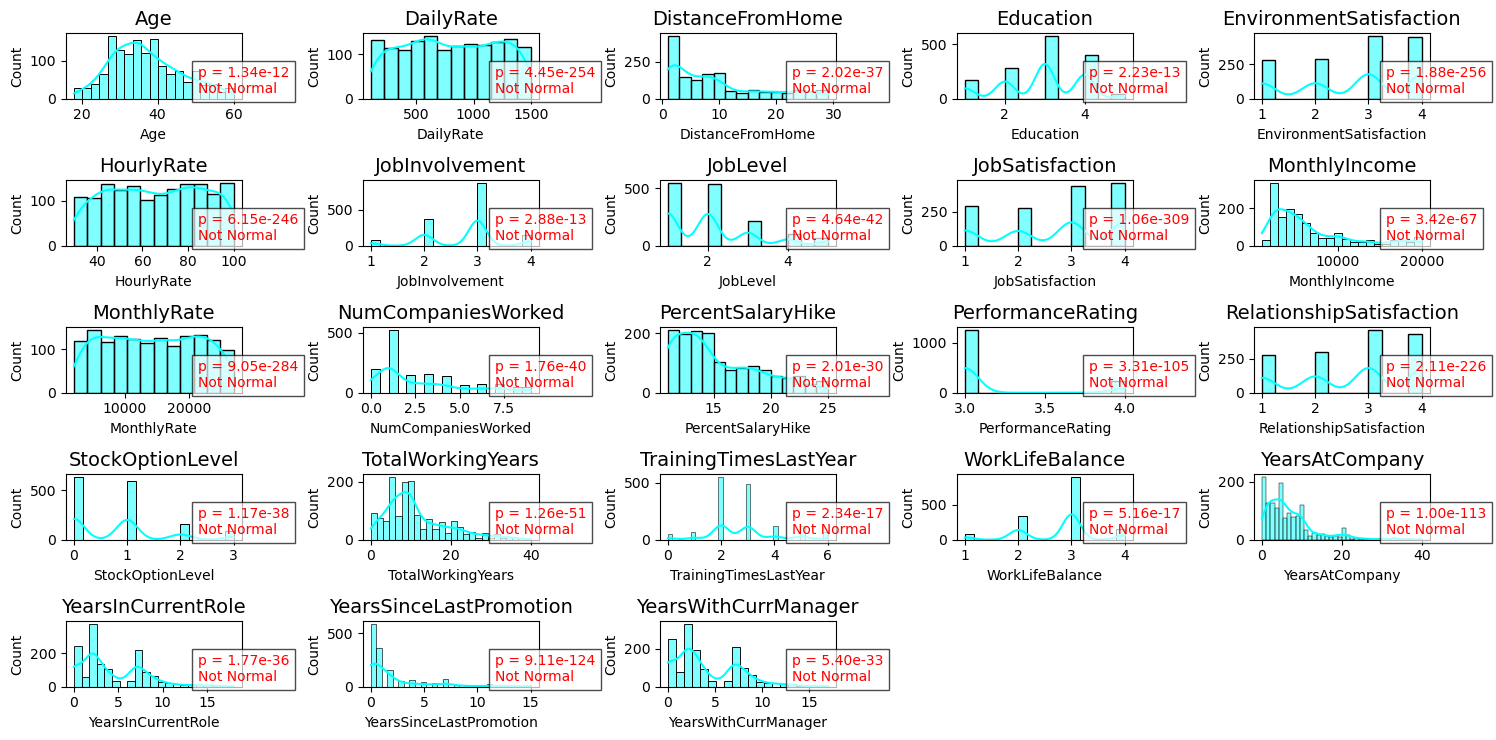

In [23]:
# Define hypotheses
Ho = "We assume Data is Normally Distributed"
Ha = "We assume Data is NOT Normally Distributed"

# Select numerical columns, excluding Attrition and EmpID
numerical_cols = df.drop(columns=['Attrition', 'EmpID']).select_dtypes(include=['number']).columns

# Define subplot grid
num_cols = 5
num_rows = int(np.ceil(len(numerical_cols) / num_cols))
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 7.5))
axes = axes.flatten()

# Plot histograms with KDE and normality test results
for i, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[i], color='cyan', kde=True)
    axes[i].set_title(col, fontsize=14)

    # Perform normality test
    stat, p_value = normaltest(df[col])

    # Determine conclusion
    conclusion = "Normal" if p_value >= 0.05 else "Not Normal"

    # Display normality test result on plot with scientific notation (2 decimal places)
    axes[i].annotate(
        f"p = {p_value:.2e}\n{conclusion}",
        xy=(0.75, 0.08), xycoords='axes fraction',  # Adjust position if needed
        fontsize=10, color='red', bbox=dict(facecolor='white', alpha=0.7)
    )

# Hide unused subplots
for ax in axes[len(numerical_cols):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


All numerical distribution is not normal, so we will use spearman to see the corelation

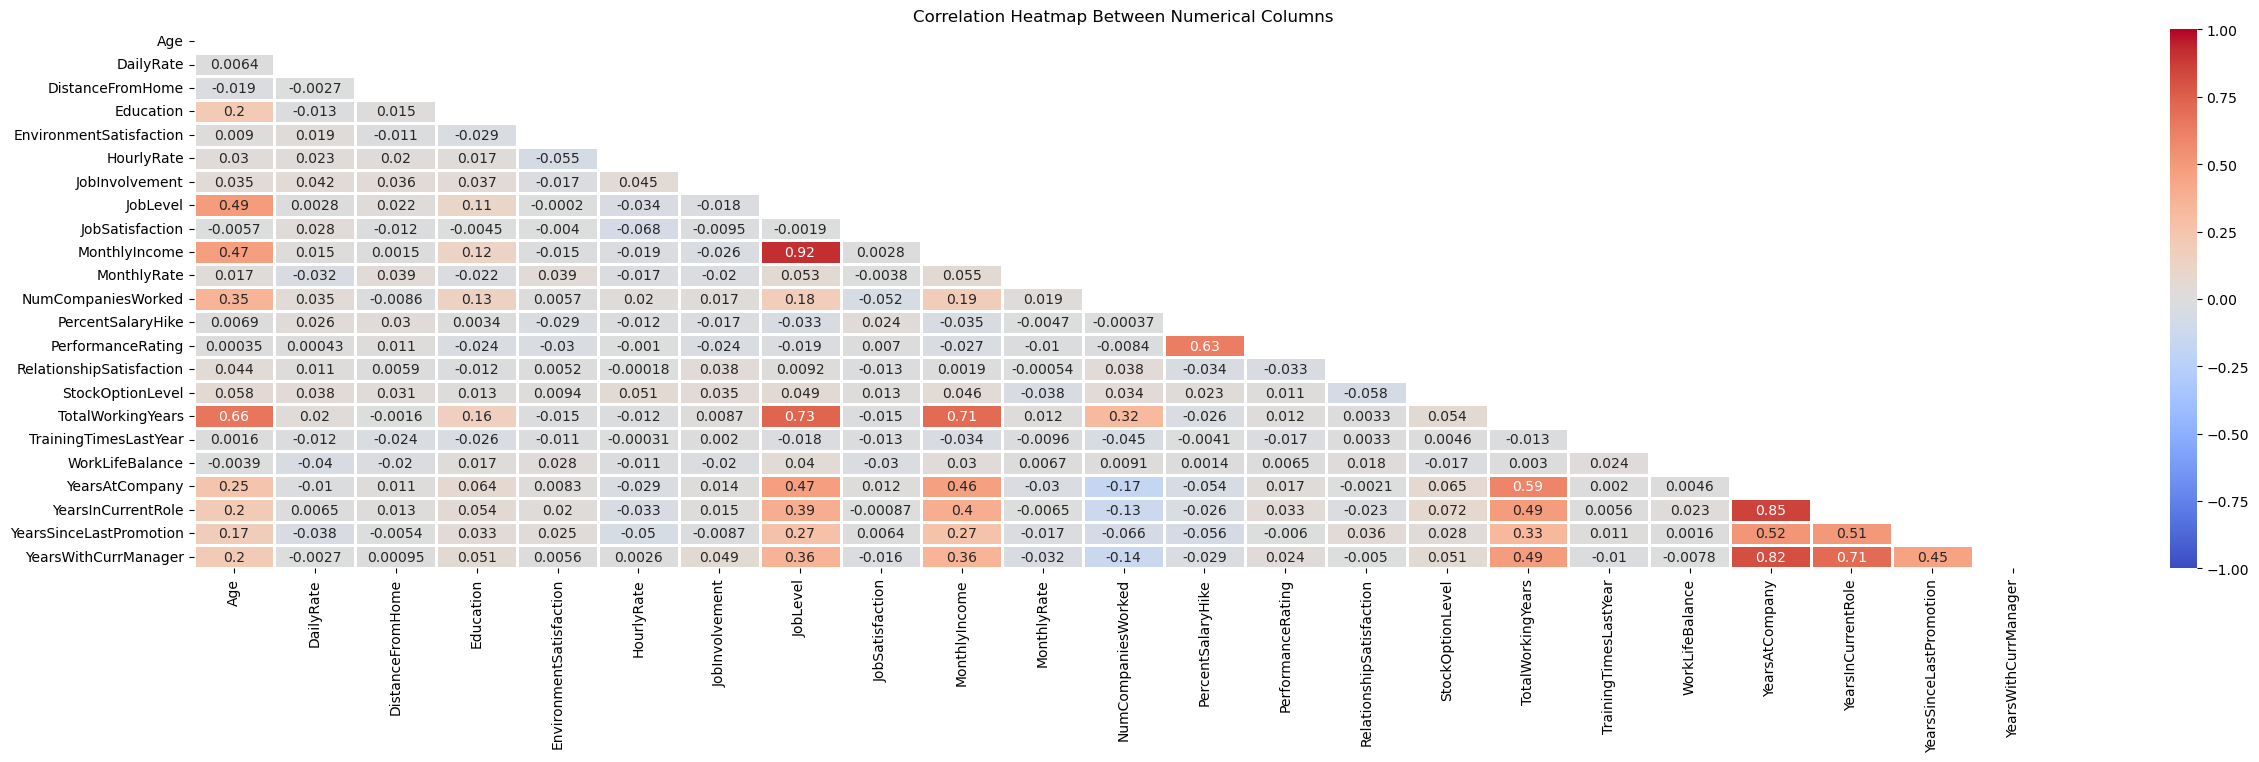

In [24]:
plt.figure(figsize=(30,7))
corr_df = df.drop(columns='Attrition').corr(numeric_only=True, method='spearman') # Most numerical columns are not normally distributed (see prev. section)
mask_for_corr = np.ones_like(corr_df,dtype='bool')
mask_for_corr = np.triu(mask_for_corr) # Set elements of the upper triangle to zeroes (s.t. it's not displayed)

sns.heatmap(corr_df, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask_for_corr, annot=True, linecolor='white', linewidth=1)
plt.xticks(rotation=90)
plt.title("Correlation Heatmap Between Numerical Columns")
plt.show()

There are heavy corelation between MonthlyIncome and JobLevel, YearsAtCompany and YearsInCurrentRole, and YearsWithCurrManager and YearsAtCompany

In [25]:
features = df[['MonthlyIncome', 'JobLevel']]  # Include only relevant features
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

         Feature        VIF
0  MonthlyIncome  22.141955
1       JobLevel  22.141955


We will divide the monthlyincome by joblevel, we will get the new column IncomePerJobLevel

In [26]:
Median_Income_perJobLevel = df.groupby(['Department','JobLevel'])['MonthlyIncome'].median().reset_index().rename(columns={'MonthlyIncome':'MedianIncome'})
Median_Income_perJobLevel

Department  JobLevel  MedianIncome
0          Human Resources         1        2696.0
1          Human Resources         2        5985.0
2          Human Resources         3        9853.0
3          Human Resources         4       16618.0
4          Human Resources         5       19189.0
5   Research & Development         1        2693.0
6   Research & Development         2        5218.0
7   Research & Development         3       10293.0
8   Research & Development         4       16370.5
9   Research & Development         5       19237.0
10                   Sales         1        2572.0
11                   Sales         2        5423.0
12                   Sales         3        9250.0
13                   Sales         4       15699.5
14                   Sales         5       19068.0

In [27]:
Median_Income_perJobLevel = df.groupby(['Department','JobLevel'])['MonthlyIncome'].median().reset_index().rename(columns={'MonthlyIncome':'MedianIncome'})
Median_Income_perJobLevel

df = df.merge(Median_Income_perJobLevel, how='left', on=['Department', 'JobLevel'])
df['SalaryGap'] = df['MonthlyIncome'] - df['MedianIncome']
df.drop(columns=['MonthlyIncome', 'MedianIncome'], inplace=True)
df


EmpID  Age AgeGroup  Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25          1      Travel_Rarely        230   
1      RM302   18    18-25          0      Travel_Rarely        812   
2      RM458   18    18-25          1  Travel_Frequently       1306   
3      RM728   18    18-25          0         Non-Travel        287   
4      RM829   18    18-25          1         Non-Travel        247   
...      ...  ...      ...        ...                ...        ...   
1468   RM412   60      55+          0      Travel_Rarely        422   
1469   RM428   60      55+          0  Travel_Frequently       1499   
1470   RM537   60      55+          0      Travel_Rarely       1179   
1471   RM880   60      55+          0      Travel_Rarely        696   
1472  RM1210   60      55+          0      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development                 3          3  Life Sciences   
1                      Sales                10          3        Medical   
2                      Sales                 5          3      Marketing   
3     Research & Development                 5          2  Life Sciences   
4     Research & Development                 8          1        Medical   
...                      ...               ...        ...            ...   
1468  Research & Development                 7          3  Life Sciences   
1469                   Sales                28          3      Marketing   
1470                   Sales                16          4      Marketing   
1471                   Sales                 7          4      Marketing   
1472  Research & Development                 1          4        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           3    Male          54               3         1   
1                           4  Female          69               2         1   
2                           2    Male          69               3         1   
3                           2    Male          73               3         1   
4                           3    Male          80               3         1   
...                       ...     ...         ...             ...       ...   
1468                        1  Female          41               3         5   
1469                        3  Female          80               2         3   
1470                        1    Male          84               3         2   
1471                        2    Male          52               4         2   
1472                        3    Male          92               1         3   

                        JobRole  JobSatisfaction MaritalStatus SalarySlab  \
0         Laboratory Technician                3        Single    Upto 5k   
1          Sales Representative                3        Single    Upto 5k   
2          Sales Representative                2        Single    Upto 5k   
3            Research Scientist                4        Single    Upto 5k   
4         Laboratory Technician                3        Single    Upto 5k   
...                         ...              ...           ...        ...   
1468                    Manager                1       Married       15k+   
1469            Sales Executive                1       Married    10k-15k   
1470            Sales Executive                1        Single     5k-10k   
1471            Sales Executive                4      Divorced     5k-10k   
1472  Healthcare Representative                4      Divorced    10k-15k   

      MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0           25233                   1       No                 13   
1            9724                   1       No                 12   
2            8059                   1      Yes                 14   
3           13493                   1       No                 15   
4           13556     

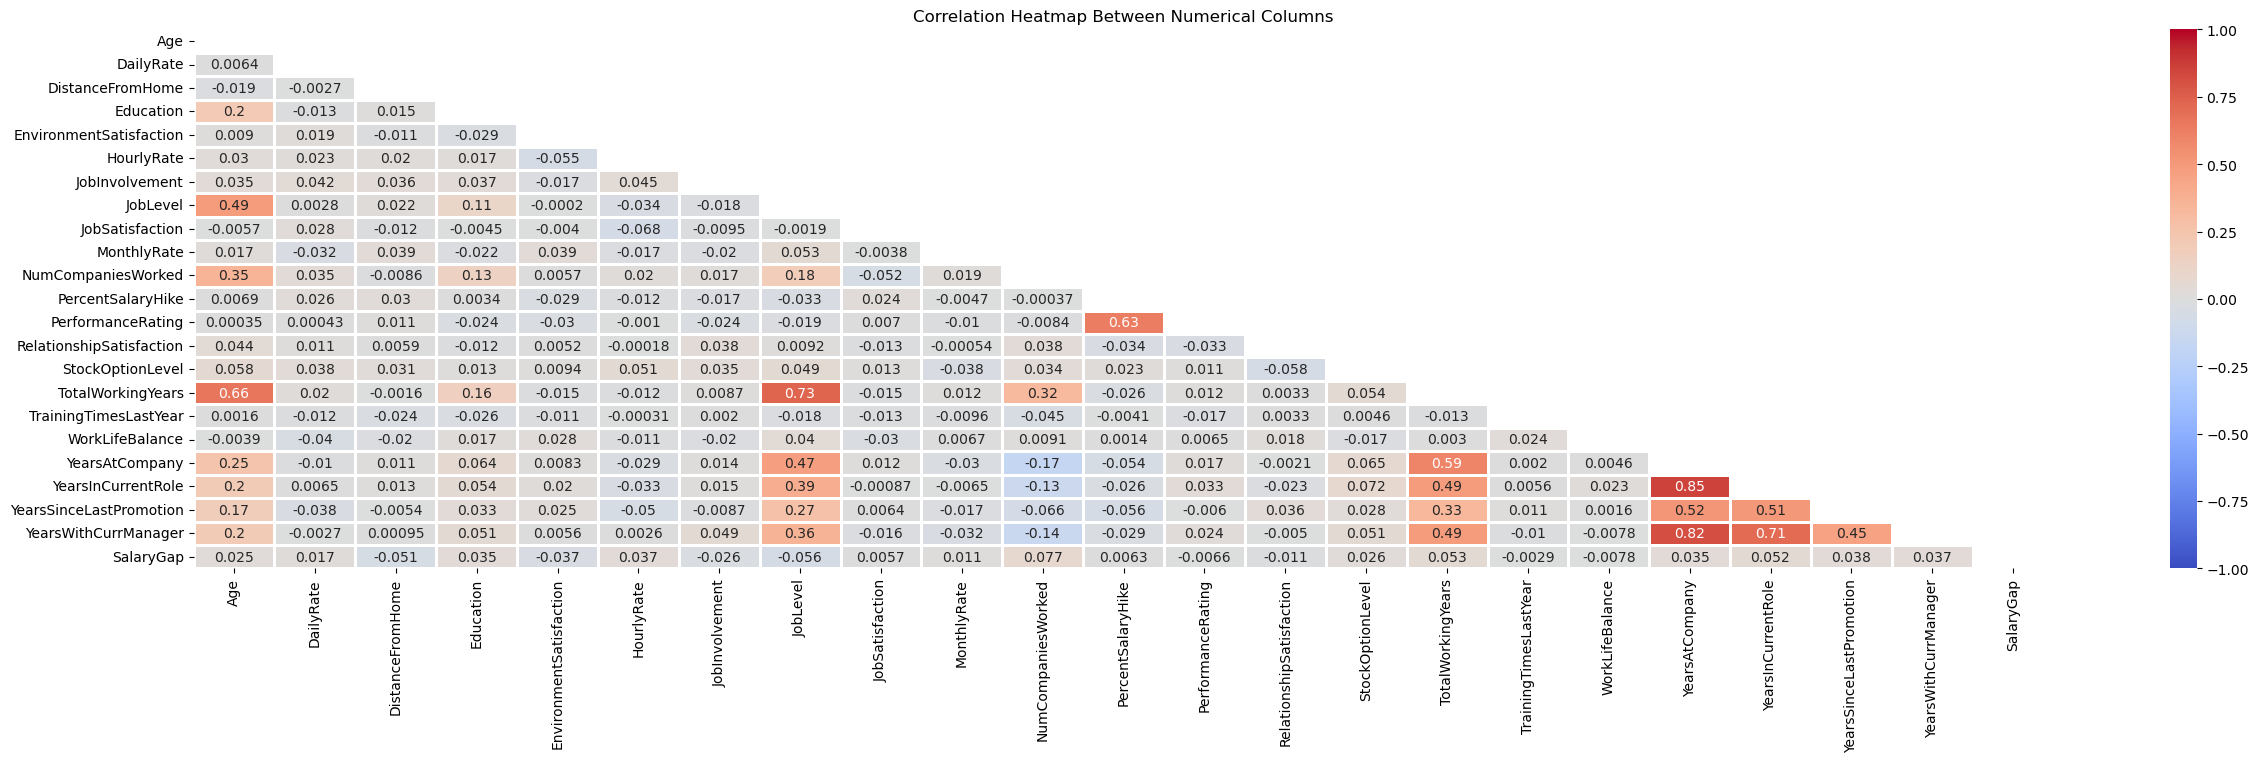

In [28]:
plt.figure(figsize=(30,7))
corr_df = df.drop(columns='Attrition').corr(numeric_only=True, method='spearman') # Most numerical columns are not normally distributed (see prev. section)
mask_for_corr = np.ones_like(corr_df,dtype='bool')
mask_for_corr = np.triu(mask_for_corr) # Set elements of the upper triangle to zeroes (s.t. it's not displayed)

sns.heatmap(corr_df, vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=mask_for_corr, annot=True, linecolor='white', linewidth=1)
plt.xticks(rotation=90)
plt.title("Correlation Heatmap Between Numerical Columns")
plt.show()

YearsAtCompany and YearsInCurrentRole

In [29]:
features = df[['YearsAtCompany', 'YearsInCurrentRole']]  # Include only relevant features
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

              Feature       VIF
0      YearsAtCompany  5.103494
1  YearsInCurrentRole  5.103494


YearsWithCurrManager and YearsAtCompany

In [30]:
features = df[['YearsWithCurrManager', 'YearsAtCompany']]  # Include only relevant features
vif_data = pd.DataFrame()
vif_data["Feature"] = features.columns
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)

                Feature       VIF
0  YearsWithCurrManager  5.002158
1        YearsAtCompany  5.002158


We will left this 2 because the VIF is moderate above 4

In [31]:
df

EmpID  Age AgeGroup  Attrition     BusinessTravel  DailyRate  \
0      RM297   18    18-25          1      Travel_Rarely        230   
1      RM302   18    18-25          0      Travel_Rarely        812   
2      RM458   18    18-25          1  Travel_Frequently       1306   
3      RM728   18    18-25          0         Non-Travel        287   
4      RM829   18    18-25          1         Non-Travel        247   
...      ...  ...      ...        ...                ...        ...   
1468   RM412   60      55+          0      Travel_Rarely        422   
1469   RM428   60      55+          0  Travel_Frequently       1499   
1470   RM537   60      55+          0      Travel_Rarely       1179   
1471   RM880   60      55+          0      Travel_Rarely        696   
1472  RM1210   60      55+          0      Travel_Rarely        370   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development                 3          3  Life Sciences   
1                      Sales                10          3        Medical   
2                      Sales                 5          3      Marketing   
3     Research & Development                 5          2  Life Sciences   
4     Research & Development                 8          1        Medical   
...                      ...               ...        ...            ...   
1468  Research & Development                 7          3  Life Sciences   
1469                   Sales                28          3      Marketing   
1470                   Sales                16          4      Marketing   
1471                   Sales                 7          4      Marketing   
1472  Research & Development                 1          4        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           3    Male          54               3         1   
1                           4  Female          69               2         1   
2                           2    Male          69               3         1   
3                           2    Male          73               3         1   
4                           3    Male          80               3         1   
...                       ...     ...         ...             ...       ...   
1468                        1  Female          41               3         5   
1469                        3  Female          80               2         3   
1470                        1    Male          84               3         2   
1471                        2    Male          52               4         2   
1472                        3    Male          92               1         3   

                        JobRole  JobSatisfaction MaritalStatus SalarySlab  \
0         Laboratory Technician                3        Single    Upto 5k   
1          Sales Representative                3        Single    Upto 5k   
2          Sales Representative                2        Single    Upto 5k   
3            Research Scientist                4        Single    Upto 5k   
4         Laboratory Technician                3        Single    Upto 5k   
...                         ...              ...           ...        ...   
1468                    Manager                1       Married       15k+   
1469            Sales Executive                1       Married    10k-15k   
1470            Sales Executive                1        Single     5k-10k   
1471            Sales Executive                4      Divorced     5k-10k   
1472  Healthcare Representative                4      Divorced    10k-15k   

      MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0           25233                   1       No                 13   
1            9724                   1       No                 12   
2            8059                   1      Yes                 14   
3           13493                   1       No                 15   
4           13556     

In [32]:
Median_DailyRate_perJobLevel = df.groupby(['Department','JobLevel'])['DailyRate'].median().reset_index().rename(columns={'DailyRate':'MedianDailyRate'})
Median_DailyRate_perJobLevel

Department  JobLevel  MedianDailyRate
0          Human Resources         1            788.0
1          Human Resources         2            888.0
2          Human Resources         3            692.5
3          Human Resources         4            834.0
4          Human Resources         5            427.0
5   Research & Development         1            832.5
6   Research & Development         2            752.5
7   Research & Development         3            816.0
8   Research & Development         4            819.5
9   Research & Development         5            823.0
10                   Sales         1            746.0
11                   Sales         2            775.5
12                   Sales         3            853.0
13                   Sales         4            702.0
14                   Sales         5            685.0

In [33]:
Median_DailyRate_perJobLevel = df.groupby(['Department','JobLevel'])['DailyRate'].median().reset_index().rename(columns={'DailyRate':'MedianDailyRate'})
Median_DailyRate_perJobLevel

df = df.merge(Median_DailyRate_perJobLevel, how='left', on=['Department', 'JobLevel'])
df['DailyRateGap'] = df['DailyRate'] - df['MedianDailyRate']
df.drop(columns=['DailyRate', 'MedianDailyRate'], inplace=True)
df


EmpID  Age AgeGroup  Attrition     BusinessTravel  \
0      RM297   18    18-25          1      Travel_Rarely   
1      RM302   18    18-25          0      Travel_Rarely   
2      RM458   18    18-25          1  Travel_Frequently   
3      RM728   18    18-25          0         Non-Travel   
4      RM829   18    18-25          1         Non-Travel   
...      ...  ...      ...        ...                ...   
1468   RM412   60      55+          0      Travel_Rarely   
1469   RM428   60      55+          0  Travel_Frequently   
1470   RM537   60      55+          0      Travel_Rarely   
1471   RM880   60      55+          0      Travel_Rarely   
1472  RM1210   60      55+          0      Travel_Rarely   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development                 3          3  Life Sciences   
1                      Sales                10          3        Medical   
2                      Sales                 5          3      Marketing   
3     Research & Development                 5          2  Life Sciences   
4     Research & Development                 8          1        Medical   
...                      ...               ...        ...            ...   
1468  Research & Development                 7          3  Life Sciences   
1469                   Sales                28          3      Marketing   
1470                   Sales                16          4      Marketing   
1471                   Sales                 7          4      Marketing   
1472  Research & Development                 1          4        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           3    Male          54               3         1   
1                           4  Female          69               2         1   
2                           2    Male          69               3         1   
3                           2    Male          73               3         1   
4                           3    Male          80               3         1   
...                       ...     ...         ...             ...       ...   
1468                        1  Female          41               3         5   
1469                        3  Female          80               2         3   
1470                        1    Male          84               3         2   
1471                        2    Male          52               4         2   
1472                        3    Male          92               1         3   

                        JobRole  JobSatisfaction MaritalStatus SalarySlab  \
0         Laboratory Technician                3        Single    Upto 5k   
1          Sales Representative                3        Single    Upto 5k   
2          Sales Representative                2        Single    Upto 5k   
3            Research Scientist                4        Single    Upto 5k   
4         Laboratory Technician                3        Single    Upto 5k   
...                         ...              ...           ...        ...   
1468                    Manager                1       Married       15k+   
1469            Sales Executive                1       Married    10k-15k   
1470            Sales Executive                1        Single     5k-10k   
1471            Sales Executive                4      Divorced     5k-10k   
1472  Healthcare Representative                4      Divorced    10k-15k   

      MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0           25233                   1       No                 13   
1            9724                   1       No                 12   
2            8059                   1      Yes                 14   
3           13493                   1       No                 15   
4           13556                   1       No                 12   
...           ...                 ...      ...                ...   
1468         385

## 2.2. Categorical Column


        ------------------------  AgeGroup ------------------------
        p-value = 0.00000. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that AgeGroup and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition    0    1  Percentage_Attrition
AgeGroup                                 
18-25       79   44                 35.77
26-35      491  116                 19.11
55+         39    8                 17.02
46-55      200   26                 11.50
36-45      427   43                  9.15


        ------------------------  BusinessTravel ------------------------
        p-value = 0.00001. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that BusinessTravel and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition            0    1  Percentage_Attrition
BusinessTravel                                   
Travel_Frequently  209   69                 24.82
Travel_Rarely      889  156                 14.93
Non-Travel         138   12                  8.00


        ------------------------  Department ------------------------
        p-value = 0.00453. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that Department and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition                 0    1  Percentage_Attrition
Department                                            
Sales                   355   92                 20.58
Human Resources          51   12                 19.05
Research & Development  830  133                 13.81


        ------------------------  EducationField ------------------------
        p-value = 0.00623. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that EducationField and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition           0   1  Percentage_Attrition
EducationField                                 
Human Resources    20   7                 25.93
Technical Degree  100  32                 24.24
Marketing         124  35                 22.01
Life Sciences     517  89                 14.69
Medical           403  63                 13.52
Other              72  11                 13.25


        ------------------------  Gender ------------------------
        p-value = 0.29277. p-value >= 0.05. Fail to reject Ho. 
        We do NOT have enough evidence to conclude that Gender and Attrition have a relationship (the proportions are different).
        (The proportions are not significantly different)
        


<Figure size 1000x500 with 0 Axes>

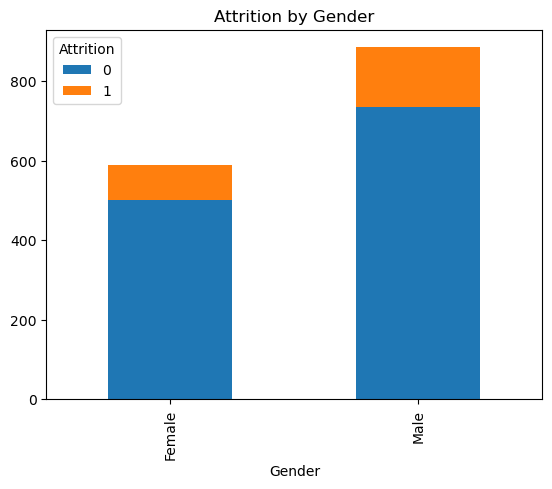


        ------------------------  JobRole ------------------------
        p-value = 0.00000. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that JobRole and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition                    0   1  Percentage_Attrition
JobRole                                                 
Sales Representative        51  33                 39.29
Laboratory Technician      198  62                 23.85
Human Resources             40  12                 23.08
Sales Executive            269  57                 17.48
Research Scientist         245  47                 16.10
Manufacturing Director     135  10                  6.90
Healthcare Representative  123   9                  6.82
Manager                     97   5                  4.90
Research Director           78   2                  2.50


        ------------------------  MaritalStatus ------------------------
        p-value = 0.00000. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that MaritalStatus and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition        0    1  Percentage_Attrition
MaritalStatus                                
Single         351  120                 25.48
Married        591   84                 12.44
Divorced       294   33                 10.09


        ------------------------  SalarySlab ------------------------
        p-value = 0.00000. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that SalarySlab and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition     0    1  Percentage_Attrition
SalarySlab                                
Upto 5k     588  163                 21.70
10k-15k     128   20                 13.51
5k-10k      392   49                 11.11
15k+        128    5                  3.76


        ------------------------  OverTime ------------------------
        p-value = 0.00000. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that OverTime and Attrition have a relationship (the proportions are different).
        (The proportions are significantly different)
        


Attrition    0    1  Percentage_Attrition
OverTime                                 
Yes        289  127                 30.53
No         947  110                 10.41


Columns significantly affecting Attrition: ['AgeGroup', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'SalarySlab', 'OverTime']


In [34]:
def percentage(df, column):
    df_test = df.groupby(column)["Attrition"].value_counts().unstack().fillna(0)
    df_test["Percentage_Attrition"] = round((df_test[1] / (df_test[1] + df_test[0])) * 100, 2)
    
    return df_test.sort_values(by='Percentage_Attrition', ascending=False)

def checks(df, column):
    # Skip numerical columns
    if df[column].dtype not in ['object', 'category']:  
        return  

    # Skip columns with a single unique value
    if df[column].nunique() == 1:
        return  

    # Create contingency table
    df_test = df.groupby(column)["Attrition"].value_counts().unstack().fillna(0)

    # Define null and alternative hypotheses
    Ho = f"{column} and Attrition have no relationship (the proportions are the same)"
    Ha = f"{column} and Attrition have a relationship (the proportions are different)"

    # Perform Chi-Square Test
    stats, p_value, dof, expected = chi2_contingency(df_test)

    # Conclusion
    if p_value >= 0.05:
        print(f'''
        ------------------------  {column} ------------------------
        p-value = {p_value:.5f}. p-value >= 0.05. Fail to reject Ho. 
        We do NOT have enough evidence to conclude that {Ha}.
        (The proportions are not significantly different)
        ''')

        # Plot the results
        plt.figure(figsize=(10, 5))  
        df_test.plot(kind='bar', stacked=True)
        plt.title(f'Attrition by {column}')
        plt.show()

    else:
        print(f'''
        ------------------------  {column} ------------------------
        p-value = {p_value:.5f}. p-value < 0.05. Reject Ho. 
        We have enough evidence to conclude that {Ha}.
        (The proportions are significantly different)
        ''')
        list_affect_churn.append(column)
        display(percentage(df, column))  # ✅ Show the percentage table

# List to store significant features
list_affect_churn = []

# Apply the function to categorical columns only
for x in (df.drop(columns='EmpID')).select_dtypes(include=['object', 'category']).columns:
    checks(df, x)

print("\nColumns significantly affecting Attrition:", list_affect_churn)


In [35]:
df.head()

EmpID  Age AgeGroup  Attrition     BusinessTravel              Department  \
0  RM297   18    18-25          1      Travel_Rarely  Research & Development   
1  RM302   18    18-25          0      Travel_Rarely                   Sales   
2  RM458   18    18-25          1  Travel_Frequently                   Sales   
3  RM728   18    18-25          0         Non-Travel  Research & Development   
4  RM829   18    18-25          1         Non-Travel  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 3          3  Life Sciences                        3   
1                10          3        Medical                        4   
2                 5          3      Marketing                        2   
3                 5          2  Life Sciences                        2   
4                 8          1        Medical                        3   

   Gender  HourlyRate  JobInvolvement  JobLevel                JobRole  \
0    Male          54               3         1  Laboratory Technician   
1  Female          69               2         1   Sales Representative   
2    Male          69               3         1   Sales Representative   
3    Male          73               3         1     Research Scientist   
4    Male          80               3         1  Laboratory Technician   

   JobSatisfaction MaritalStatus SalarySlab  MonthlyRate  NumCompaniesWorked  \
0                3        Single    Upto 5k        25233                   1   
1                3        Single    Upto 5k         9724                   1   
2                2        Single    Upto 5k         8059                   1   
3                4        Single    Upto 5k        13493                   1   
4                3        Single    Upto 5k        13556                   1   

  OverTime  PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0       No                 13                  3                         3   
1       No                 12                  3                         1   
2      Yes                 14                  3                         4   
3       No                 15                  3                         4   
4       No                 12                  3                         4   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  0                      2   
1                 0                  0                      2   
2                 0                  0                      3   
3                 0                  0                      2   
4                 0                  0                      0   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                3               0                   0   
1                3               0                   0   
2                3               0                   0   
3                3               0                   0   
4                3               0                   0   

   YearsSinceLastPromotion  YearsWithCurrManager  SalaryGap  DailyRateGap  
0                        0                   0.0    -1273.0        -602.5  
1                        0                   0.0    -1372.0          66.0  
2                        0                   0.0     -694.0         560.0  
3                        0                   0.0    -1642.0        -545.5  
4                        0                   0.0     -789.0        -585.5

In [36]:
df.to_csv('Dataset/df_clean.csv',index=0)

# **3. Predict Churn Employee**

## 3.1. Define X dan y

In [37]:
X = df.drop(columns=['EmpID','Attrition'])
y = df['Attrition']

## 3.2. Data Splitting

Checking Balance leaving and not leaving in data

In [38]:
Leave_True = (df['Attrition'] == True).sum()
Not_Leave = (df['Attrition'] == False).sum()
Leave_True,Not_Leave

(237, 1236)

Data not balanced, we will use resampling

In [39]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,test_size=0.2,
random_state=0,
stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1178, 32), (295, 32), (1178,), (295,))

In [40]:
X_train.head()

Age AgeGroup     BusinessTravel              Department  \
1273   48    46-55  Travel_Frequently                   Sales   
680    35    26-35      Travel_Rarely  Research & Development   
1303   50    46-55  Travel_Frequently                   Sales   
63     23    18-25      Travel_Rarely  Research & Development   
222    28    26-35      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1273                 7          2        Medical                        4   
680                  7          3          Other                        3   
1303                12          3      Marketing                        3   
63                   1          2  Life Sciences                        4   
222                  1          2  Life Sciences                        1   

      Gender  HourlyRate  JobInvolvement  JobLevel                 JobRole  \
1273  Female          95               3         1    Sales Representative   
680     Male          59               3         3  Manufacturing Director   
1303  Female          77               3         3         Sales Executive   
63      Male          47               3         1      Research Scientist   
222   Female          67               1         1      Research Scientist   

      JobSatisfaction MaritalStatus SalarySlab  MonthlyRate  \
1273                3       Married    Upto 5k        11740   
680                 3        Single    10k-15k        18869   
1303                4        Single     5k-10k         6645   
63                  3       Married    Upto 5k        16901   
222                 2        Single    Upto 5k         3872   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
1273                   2      Yes                 11                  3   
680                    3       No                 21                  4   
1303                   4       No                 11                  3   
63                     1       No                 22                  4   
222                    7      Yes                 13                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1273                         3                 2                 19   
680                          2                 0                 17   
1303                         4                 0                 16   
63                           4                 1                  1   
222                          4                 0                 10   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1273                      3                3               9   
680                       3                4               8   
1303                      3                3               2   
63                        2                3               1   
222                       4                3               7   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1273                   7                        7                   7.0   
680                    5                        1                   6.0   
1303                   2                        2                   1.0   
63                     0                        0                   1.0   
222                    7                        3                   7.0   

      SalaryGap  DailyRateGap  
1273       83.0         -38.0  
680       -72.0         134.0  
1303      -42.0         -44.0  
63      -1470.0        -459.5  
222      -477.0        -178.5

## 3.3. Preprocessing 

One Hot : ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','SalarySlab','OverTime']

Ordinal : ['AgeGroup']

Robust : ['Age','DailyRateGap','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','SalaryGap','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [41]:
One_Hot = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','SalarySlab','OverTime']

Ordinal = ['AgeGroup']

Robust = ['Age','DailyRateGap','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
          'JobInvolvement','JobLevel','JobSatisfaction','SalaryGap','MonthlyRate','NumCompaniesWorked',
          'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
          'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

ordinal_encoding = [
    {  # Ranking: higher values indicate higher churn risk
        'col': 'AgeGroup',
        'mapping': {
            '55+': 1,
            '46-55': 2,
            '36-45': 3,
            '26-35': 4,
            '18-25' : 5
        }
    }
]

pipe_ordinal_robust = Pipeline([
    ('ordinal',OrdinalEncoder(mapping=ordinal_encoding)),
    ('robust',RobustScaler())
])


transformer = ColumnTransformer([
    ('pipe_ordinal_robust', pipe_ordinal_robust, Ordinal),
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'),
     One_Hot)
])


In [42]:
transformed_array = transformer.fit_transform(X_train)
transformed_array

array([[-1.        ,  0.92307692, -0.04153005, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        , -0.07692308,  0.20910747, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  1.07692308, -0.05027322, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        , -0.23076923, -0.54499089, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        ,  0.84615385,  0.34972678, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        , -0.15384615,  0.60327869, ...,  0.        ,
         1.        ,  0.        ]])

## 3.4. Cross Validation

we will use this model :

1. Logistic Regression
2. Decision Tree Classifier
3. Random Forest Classifier
4. Extra Trees Classifier
5. Gradient Boosting Classifier (GBM)
6. XGBoost
7. LightGBM
8. CatBoost
9. K-Nearest Neighbors (KNN)

In [43]:
# Define classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
extra_trees = ExtraTreesClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42,verbose=-1)
catboost = CatBoostClassifier(random_state=42, verbose=0)
knn = KNeighborsClassifier()

# Define multiple F-beta scorers
scorers = {
    "f2_score": make_scorer(fbeta_score, beta=2),
    "f1.5_score": make_scorer(fbeta_score, beta=1.5),
    "f1.8_score": make_scorer(fbeta_score, beta=1.8),
    "accuracy": make_scorer(accuracy_score),  # ✅ Fixed accuracy_score
    "recall": make_scorer(recall_score)  # ✅ Added recall
}

# Define models (including Voting Classifier)
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Extra Trees": extra_trees,
    "Gradient Boosting": gradient_boosting,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "KNN": knn,
    "Voting Classifier": VotingClassifier(estimators=[
        ('clf1', log_reg),
        ('clf2', random_forest),
        ('clf3', lightgbm),
        ('clf4', catboost),
        ('clf5', xgboost)
    ])
}

# Store results
results = []

# Loop through each model
for model_name, model in models.items():
    # Create pipeline
    pipe = Pipeline([
        ('scaling', transformer),
        ('modeling', model)
    ])

    # Perform cross-validation
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)

    # Store results
     # Store results
    results.append({
        "Model": model_name,
        "F2 Mean": cv_results["test_f2_score"].mean(),
        "F2 Std": cv_results["test_f2_score"].std(),
        "F1.5 Mean": cv_results["test_f1.5_score"].mean(),
        "F1.5 Std": cv_results["test_f1.5_score"].std(),
        "F1.8 Mean": cv_results["test_f1.8_score"].mean(),
        "F1.8 Std": cv_results["test_f1.8_score"].std(),
        "Accuracy Mean": cv_results["test_accuracy"].mean(),
        "Accuracy Std": cv_results["test_accuracy"].std(),
        "Recall Mean": cv_results["test_recall"].mean(),
        "Recall Std": cv_results["test_recall"].std()
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).sort_values(by="F1.5 Mean", ascending=False)

# Print results
df_results


Model   F2 Mean    F2 Std  F1.5 Mean  F1.5 Std  F1.8 Mean  \
0  Logistic Regression  0.433142  0.016853   0.453464  0.015522   0.439694   
5              XGBoost  0.357479  0.089303   0.377097  0.092585   0.363760   
4    Gradient Boosting  0.341114  0.023293   0.364306  0.020326   0.348486   
6             LightGBM  0.327046  0.067335   0.351770  0.068611   0.334869   
1        Decision Tree  0.347484  0.081573   0.342423  0.080578   0.345759   
9    Voting Classifier  0.279854  0.063556   0.305546  0.068414   0.287909   
7             CatBoost  0.246195  0.017871   0.270963  0.018677   0.253917   
3          Extra Trees  0.168794  0.025192   0.187792  0.028195   0.174676   
2        Random Forest  0.120112  0.045403   0.134726  0.050067   0.124609   
8                  KNN  0.113888  0.037930   0.127805  0.042541   0.118171   

   F1.8 Std  Accuracy Mean  Accuracy Std  Recall Mean  Recall Std  
0  0.016371       0.868428      0.006969     0.400000    0.019693  
5  0.090346       0.855680      0.021514     0.326316    0.084211  
4  0.022404       0.861626      0.006949     0.305263    0.026837  
6  0.067790       0.865878      0.011536     0.289474    0.064460  
1  0.081208       0.768179      0.039037     0.357895    0.084211  
9  0.065091       0.865031      0.016141     0.242105    0.056195  
7  0.018121       0.862477      0.007416     0.210526    0.016644  
3  0.026117       0.850595      0.008623     0.142105    0.021053  
2  0.046858       0.847187      0.008689     0.100000    0.038676  
8  0.039350       0.843805      0.010508     0.094737    0.031579

In [44]:
df_results.sort_values('F1.5 Mean',ascending=False)

Model   F2 Mean    F2 Std  F1.5 Mean  F1.5 Std  F1.8 Mean  \
0  Logistic Regression  0.433142  0.016853   0.453464  0.015522   0.439694   
5              XGBoost  0.357479  0.089303   0.377097  0.092585   0.363760   
4    Gradient Boosting  0.341114  0.023293   0.364306  0.020326   0.348486   
6             LightGBM  0.327046  0.067335   0.351770  0.068611   0.334869   
1        Decision Tree  0.347484  0.081573   0.342423  0.080578   0.345759   
9    Voting Classifier  0.279854  0.063556   0.305546  0.068414   0.287909   
7             CatBoost  0.246195  0.017871   0.270963  0.018677   0.253917   
3          Extra Trees  0.168794  0.025192   0.187792  0.028195   0.174676   
2        Random Forest  0.120112  0.045403   0.134726  0.050067   0.124609   
8                  KNN  0.113888  0.037930   0.127805  0.042541   0.118171   

   F1.8 Std  Accuracy Mean  Accuracy Std  Recall Mean  Recall Std  
0  0.016371       0.868428      0.006969     0.400000    0.019693  
5  0.090346       0.855680      0.021514     0.326316    0.084211  
4  0.022404       0.861626      0.006949     0.305263    0.026837  
6  0.067790       0.865878      0.011536     0.289474    0.064460  
1  0.081208       0.768179      0.039037     0.357895    0.084211  
9  0.065091       0.865031      0.016141     0.242105    0.056195  
7  0.018121       0.862477      0.007416     0.210526    0.016644  
3  0.026117       0.850595      0.008623     0.142105    0.021053  
2  0.046858       0.847187      0.008689     0.100000    0.038676  
8  0.039350       0.843805      0.010508     0.094737    0.031579

In [45]:
df_results.sort_values('F1.8 Mean',ascending=False)

Model   F2 Mean    F2 Std  F1.5 Mean  F1.5 Std  F1.8 Mean  \
0  Logistic Regression  0.433142  0.016853   0.453464  0.015522   0.439694   
5              XGBoost  0.357479  0.089303   0.377097  0.092585   0.363760   
4    Gradient Boosting  0.341114  0.023293   0.364306  0.020326   0.348486   
1        Decision Tree  0.347484  0.081573   0.342423  0.080578   0.345759   
6             LightGBM  0.327046  0.067335   0.351770  0.068611   0.334869   
9    Voting Classifier  0.279854  0.063556   0.305546  0.068414   0.287909   
7             CatBoost  0.246195  0.017871   0.270963  0.018677   0.253917   
3          Extra Trees  0.168794  0.025192   0.187792  0.028195   0.174676   
2        Random Forest  0.120112  0.045403   0.134726  0.050067   0.124609   
8                  KNN  0.113888  0.037930   0.127805  0.042541   0.118171   

   F1.8 Std  Accuracy Mean  Accuracy Std  Recall Mean  Recall Std  
0  0.016371       0.868428      0.006969     0.400000    0.019693  
5  0.090346       0.855680      0.021514     0.326316    0.084211  
4  0.022404       0.861626      0.006949     0.305263    0.026837  
1  0.081208       0.768179      0.039037     0.357895    0.084211  
6  0.067790       0.865878      0.011536     0.289474    0.064460  
9  0.065091       0.865031      0.016141     0.242105    0.056195  
7  0.018121       0.862477      0.007416     0.210526    0.016644  
3  0.026117       0.850595      0.008623     0.142105    0.021053  
2  0.046858       0.847187      0.008689     0.100000    0.038676  
8  0.039350       0.843805      0.010508     0.094737    0.031579

Logistic Regression	

Logistic Regression CLASSIFIER PIPELINE BEFORE TUNING
CV F2: [0.4046 0.4444 0.4545 0.4286 0.4335]
CV F2 Mean: 0.4331
CV F2 Std: 0.0169
Train F2: 0.4954
Test F2: 0.4884


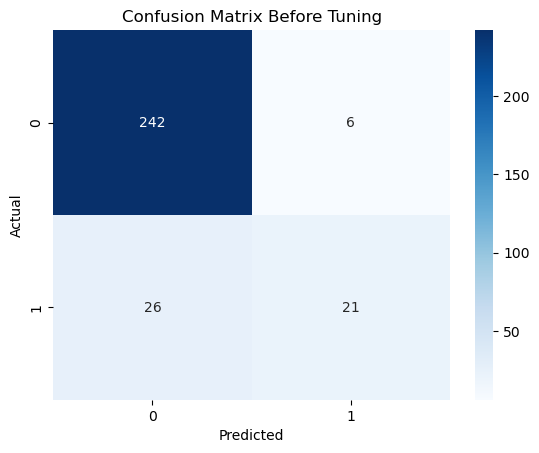

In [46]:
# Define F1.5 scorer
f1_5_scorer = make_scorer(fbeta_score, beta=1.5)


# Define Pipeline
pipe = Pipeline([
    ('scaling', transformer),
    ('modeling', log_reg)
])

# Define F2-score for evaluation
f2_scorer = make_scorer(fbeta_score, beta=2)  # ✅ Use F2-score

# Perform cross-validation using F2-score
cv_score = cross_val_score(
    pipe, 
    X_train, 
    y_train, 
    cv=5,
    groups=X_train.index,
    scoring=f2_scorer  # ✅ Use F2-score
)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Compute F2-score for train and test sets
f2_train = fbeta_score(y_train, pipe.predict(X_train), beta=2)
f2_test = fbeta_score(y_test, y_pred, beta=2)

# Print results
print("Logistic Regression CLASSIFIER PIPELINE BEFORE TUNING")
print(f"CV F2: {np.round(cv_score, 4)}")
print("CV F2 Mean:", np.mean(cv_score).round(4))
print("CV F2 Std:", np.std(cv_score).round(4))
print("Train F2:", f2_train.round(4))
print("Test F2:", f2_test.round(4))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap="Blues")
plt.title("Confusion Matrix Before Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

                                     Feature  Importance
47                      onehot__OverTime_Yes    1.709193
24  onehot__BusinessTravel_Travel_Frequently    1.393844
43              onehot__MaritalStatus_Single    1.043845
45                 onehot__SalarySlab_5k-10k    0.988291
35     onehot__JobRole_Laboratory Technician    0.962697
38         onehot__JobRole_Research Director    0.829403
41      onehot__JobRole_Sales Representative    0.823032
5            robust__EnvironmentSatisfaction    0.812222
9                    robust__JobSatisfaction    0.692101
17                 robust__TotalWorkingYears    0.688589


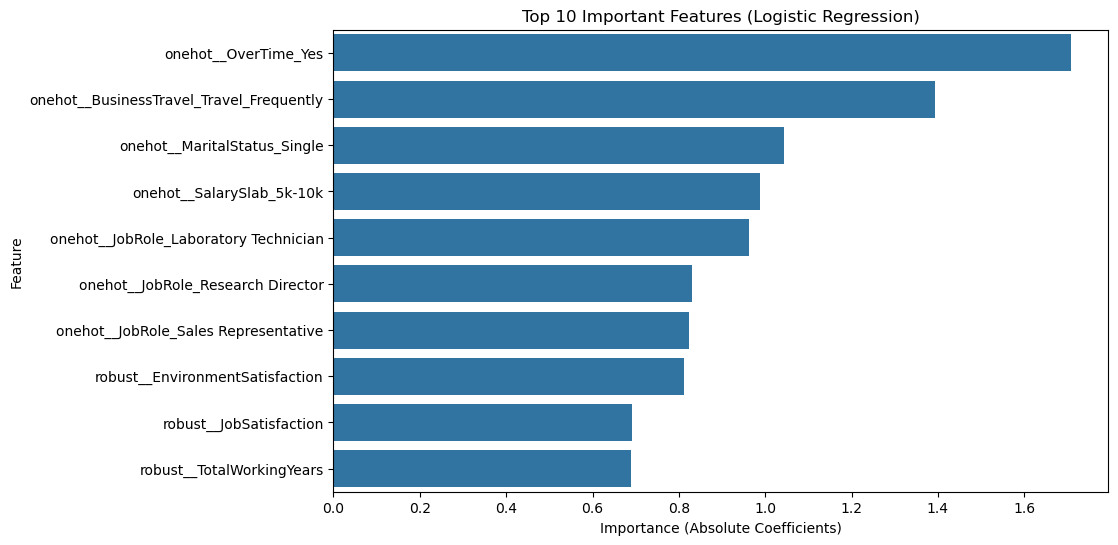

In [47]:
# Get feature names from transformer
feature_names = transformer.get_feature_names_out()

# Get coefficients from logistic regression
coefficients = pipe.named_steps['modeling'].coef_[0]  # Extract coefficients

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})  # Take absolute values

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'][:10], y=feature_importance['Feature'][:10])
plt.title('Top 10 Important Features (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficients)')
plt.ylabel('Feature')
plt.show()


In [48]:
df.shape

(1473, 34)

## 3.5. Hyperparameter Tuning

In [49]:
# Define resampling techniques
resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

# Define Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)

# Define hyperparameter space for Logistic Regression
hyperparam = {
    'resampling': list(resampling_methods.values()),  # Add resampling as a hyperparameter
    'modeling__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'modeling__penalty': ['l1', 'l2'],  
    'modeling__solver': ['liblinear', 'saga'],  
    'modeling__max_iter': [500, 1000],  # 500 is a good starting point
    'modeling__class_weight': [None, 'balanced'],  
}

# Define pipeline (with placeholder for resampling)
Pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', None),  # Placeholder step
    ('modeling', model)
])

# Define F2-score for optimization
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define RandomizedSearchCV
randomsearch = RandomizedSearchCV(
    estimator=Pipe_model,
    param_distributions=hyperparam,
    n_iter=20,  
    scoring={'f2': f2_scorer},
    refit='f2',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
randomsearch.fit(X_train, y_train)

# Best model parameters
print("Best Parameters:", randomsearch.best_params_)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l1', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 0.1}


In [50]:
# Show top 5 best models
pd.DataFrame(randomsearch.cv_results_).sort_values(by='rank_test_f2', ascending=True).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.019955      0.003476         0.003436        0.000152   
7        0.161978      0.004454         0.003934        0.000539   
3        0.183447      0.025658         0.004909        0.001886   
13       0.165193      0.014137         0.004258        0.000902   
5        0.014804      0.002024         0.004436        0.000991   

                                        param_resampling  \
19  SMOTE(random_state=42, sampling_strategy='minority')   
7                                                   None   
3                     RandomOverSampler(random_state=42)   
13  SMOTE(random_state=42, sampling_strategy='minority')   
5                     RandomOverSampler(random_state=42)   

   param_modeling__solver param_modeling__penalty  param_modeling__max_iter  \
19              liblinear                      l1                       500   
7                    saga                      l2                       500   
3                    saga                      l2                      1000   
13                   saga                      l2                       500   
5               liblinear                      l2                       500   

   param_modeling__class_weight  param_modeling__C  \
19                     balanced                0.1   
7                      balanced               10.0   
3                          None                1.0   
13                     balanced                1.0   
5                          None                0.1   

                                                                                                                                                                                                                   params  \
19  {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l1', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 0.1}   
7                                                         {'resampling': None, 'modeling__solver': 'saga', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 10}   
3                                 {'resampling': RandomOverSampler(random_state=42), 'modeling__solver': 'saga', 'modeling__penalty': 'l2', 'modeling__max_iter': 1000, 'modeling__class_weight': None, 'modeling__C': 1}   
13         {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'saga', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 1}   
5                           {'resampling': RandomOverSampler(random_state=42), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': None, 'modeling__C': 0.1}   

    split0_test_f2  split1_test_f2  split2_test_f2  split3_test_f2  \
19        0.644444        0.630435        0.603448        0.610860   
7         0.605381        0.651261        0.616740        0.573394   
3         0.588235        0.643777        0.633188        0.576037   
13        0.622120        0.635965        0.614035        0.625000   
5         0.545852        0.606061        0.646552        0.639269   

    split4_test_f2  mean_test_f2  std_test_f2  rank_test_f2  
19        0.630435      0.623924     0.014804             1  
7         0.668103      0.622976     0.033596             2  
3         0.668103      0.621868     0.034576             3  
13        0.610860      0.621596     0.008840             4  
5         0.643777      0.616302     0.038120             5

GradientBoostingClassifier CLASSIFIER PIPELINE AFTER TUNING
CV f2: [0.6444 0.6304 0.6034 0.6109 0.6304]
CV f2 Mean: 0.6239
CV f2 Std: 0.0148
Train f2: 0.6781
Test f2: 0.6491


<Axes: >

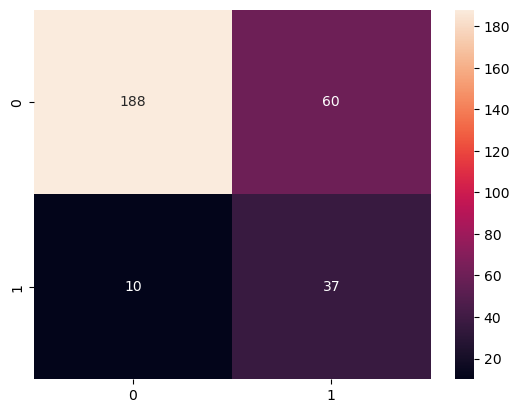

In [51]:
# Use the best model from tuning directly (it already includes preprocessing)
pipe_tune = randomsearch.best_estimator_

# Train the tuned model
pipe_tune.fit(X_train, y_train)

# Perform cross-validation scoring
cv_score = cross_val_score(
    pipe_tune, 
    X_train, 
    y_train, 
    cv=5,
    scoring=f2_scorer  # Use F1.5 scorer
)

# Predict on test set
y_pred_tune = pipe_tune.predict(X_test)

# Calculate F1.5-score
f2_train = fbeta_score(y_train, pipe_tune.predict(X_train), beta=2)
f2_test = fbeta_score(y_test, y_pred_tune, beta=2)

# Print results
print("GradientBoostingClassifier CLASSIFIER PIPELINE AFTER TUNING")
print(f"CV f2: {np.round(cv_score, 4)}")
print("CV f2 Mean:", np.mean(cv_score).round(4))
print("CV f2 Std:", np.std(cv_score).round(4))
print("Train f2:", f2_train.round(4))
print("Test f2:", f2_test.round(4))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='g')


## 3.6. Cost Evaluation

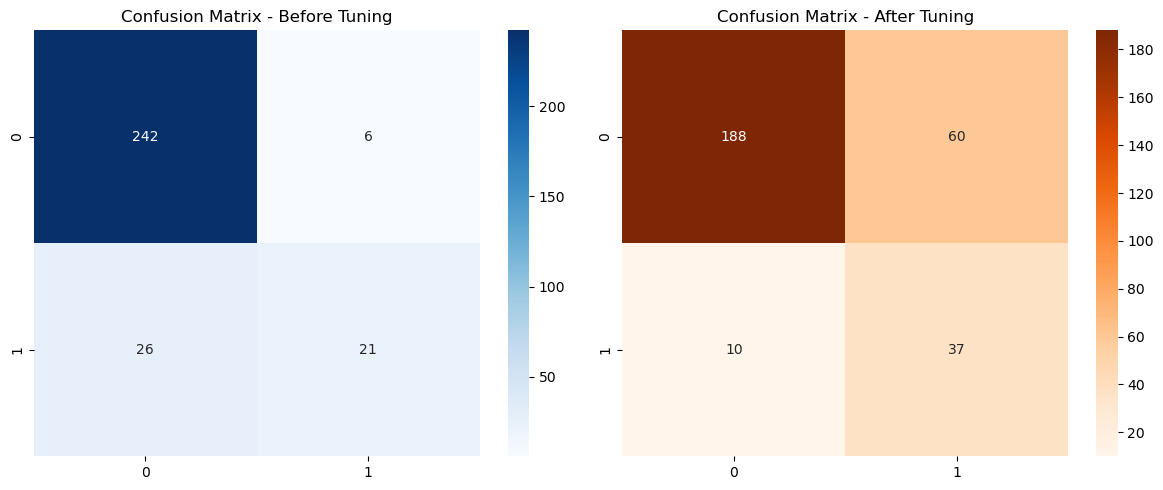

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [53]:
TN = confusion_matrix(y_test, y_pred)[0][0]
FN = confusion_matrix(y_test, y_pred)[1][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
TP = confusion_matrix(y_test, y_pred)[1][1]

TN_after = confusion_matrix(y_test, y_pred_tune)[0][0]
FN_after = confusion_matrix(y_test, y_pred_tune)[1][0]
FP_after = confusion_matrix(y_test, y_pred_tune)[0][1]
TP_after = confusion_matrix(y_test, y_pred_tune)[1][1]
print(f"""
    Cost Reduction Base Model :{FN*40000+FP*15000}

    Cost Reduction Tuned Model :{FN_after*40000+FP_after*15000}
    
    Company menghemat {(FN_after*40000+FP_after*15000)-(FN*40000+FP*15000)}
      
      """)

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_tune))


    Cost Reduction Base Model :1130000

    Cost Reduction Tuned Model :1300000
    
    Company menghemat 170000
      
      
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       248
           1       0.78      0.45      0.57        47

    accuracy                           0.89       295
   macro avg       0.84      0.71      0.75       295
weighted avg       0.88      0.89      0.88       295

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       248
           1       0.38      0.79      0.51        47

    accuracy                           0.76       295
   macro avg       0.67      0.77      0.68       295
weighted avg       0.86      0.76      0.79       295



## 3.7. Threshold Optimization

We will try to find the best threshold for prediction to get the best result

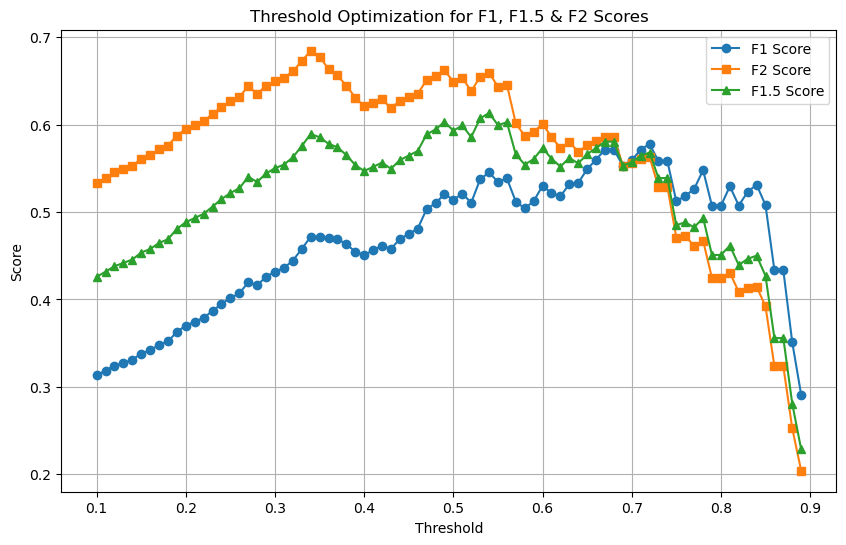

Best Threshold for F1.5 Score: 0.54
Confusion Matrix:
 [[199  49]
 [ 11  36]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.80      0.87       248
           1       0.42      0.77      0.55        47

    accuracy                           0.80       295
   macro avg       0.69      0.78      0.71       295
weighted avg       0.86      0.80      0.82       295



In [54]:
# Fit the pipeline model
pipe_tune.fit(X_train, y_train)

# Predict probabilities from the trained model
y_prob = pipe_tune.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 0.9, 0.01)

# Store scores for each threshold
f1_scores = []
f2_scores = []
f1_5_scores = []

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    
    f1_scores.append(f1_score(y_test, y_pred))
    f2_scores.append(fbeta_score(y_test, y_pred, beta=2))
    f1_5_scores.append(fbeta_score(y_test, y_pred, beta=1.5))

# Compute precision and recall for all possible thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

# Plot F1, F1.5, and F2 scores vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, f2_scores, label='F2 Score', marker='s')
plt.plot(thresholds, f1_5_scores, label='F1.5 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization for F1, F1.5 & F2 Scores')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on the highest F1.5-score
best_threshold_f1_5 = thresholds[np.argmax(f1_5_scores)]
print(f"Best Threshold for F1.5 Score: {best_threshold_f1_5:.2f}")

# Apply the best threshold
y_pred_adjusted = (y_prob > best_threshold_f1_5).astype(int)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))


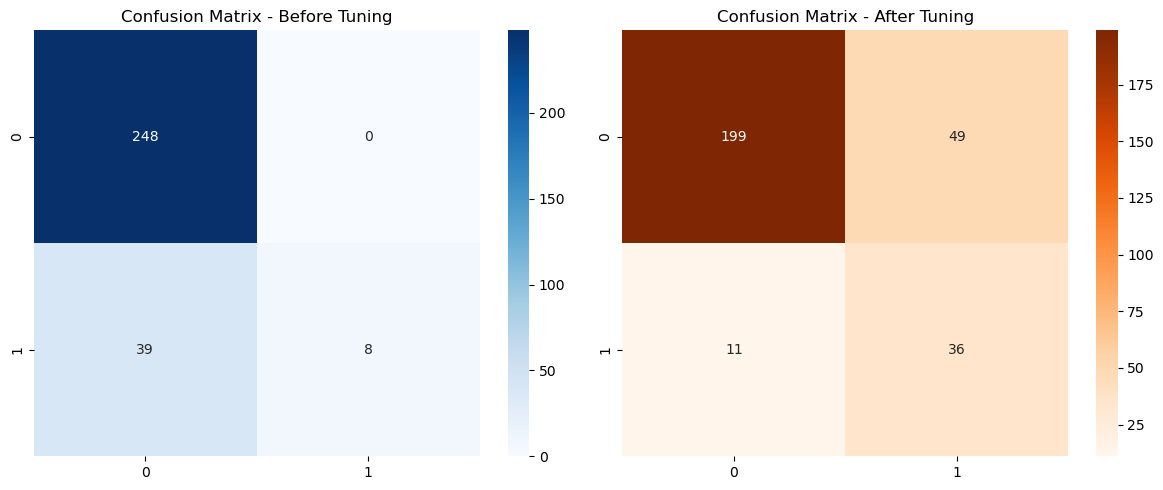

In [55]:
pipe_tune.fit(X_train, y_train)

y_pred_adjusted = (pipe_tune.predict_proba(X_test)[:, 1] > 0.54 ).astype(int)
y_pred_adjusted

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [56]:
y_test.sum()*40000

1880000

In [60]:
TN = confusion_matrix(y_test, y_pred)[0][0]
FN = confusion_matrix(y_test, y_pred)[1][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
TP = confusion_matrix(y_test, y_pred)[1][1]

TN_after = confusion_matrix(y_test, y_pred_tune)[0][0]
FN_after = confusion_matrix(y_test, y_pred_tune)[1][0]
FP_after = confusion_matrix(y_test, y_pred_tune)[0][1]
TP_after = confusion_matrix(y_test, y_pred_tune)[1][1]
print(f"""
    Cost Reduction Base Model :{FN*40000+FP*10000}

    Cost Reduction Tuned Model :{FN_after*40000+FP_after*10000}
    
    Company save {(FN_after*40000+FP_after*10000)-(FN*40000+FP*10000)}

    If not use model will lose {y_test.sum()*40000} difference {(y_test.sum()*40000)-(FN_after*40000+FP_after*10000)}
      
      """)

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_tune))


    Cost Reduction Base Model :1560000

    Cost Reduction Tuned Model :1000000
    
    Company save -560000

    If not use model will lose 1880000 difference 880000
      
      
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       248
           1       1.00      0.17      0.29        47

    accuracy                           0.87       295
   macro avg       0.93      0.59      0.61       295
weighted avg       0.89      0.87      0.83       295

              precision    recall  f1-score   support

           0       0.95      0.76      0.84       248
           1       0.38      0.79      0.51        47

    accuracy                           0.76       295
   macro avg       0.67      0.77      0.68       295
weighted avg       0.86      0.76      0.79       295



## 3.8. Feature Importance

In [56]:
best_model = randomsearch.best_estimator_

# Extract the base classifier
rf_lime = best_model.named_steps['modeling']

# Extract the preprocessing transformer
preprocessor = best_model.named_steps['preprocessing']

# Apply the preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)

# Train the model
best_model.fit(X_train, y_train)

# Get predicted probabilities
y_prob = rf_lime.predict_proba(X_test_transformed)[:, 1]  # Get probability of class 1

# Apply threshold of 0.55
y_pred = np.where(y_prob >= 0.55, 1, 0)

# Calculate accuracy
accuracy = (y_pred == y_test).mean()
accuracy


0.7932203389830509

In [57]:
feature_names_convert = [re.sub(r'^(binary__|robust__|pipe_ordinal_robust__|onehot__)', '', col) for col in feature_names]
feature_names_convert = [' '.join(word.capitalize() for word in col.split('_')) for col in feature_names_convert]
feature_names_convert

['Agegroup',
 'Age',
 'Dailyrategap',
 'Distancefromhome',
 'Education',
 'Environmentsatisfaction',
 'Hourlyrate',
 'Jobinvolvement',
 'Joblevel',
 'Jobsatisfaction',
 'Salarygap',
 'Monthlyrate',
 'Numcompaniesworked',
 'Percentsalaryhike',
 'Performancerating',
 'Relationshipsatisfaction',
 'Stockoptionlevel',
 'Totalworkingyears',
 'Trainingtimeslastyear',
 'Worklifebalance',
 'Yearsatcompany',
 'Yearsincurrentrole',
 'Yearssincelastpromotion',
 'Yearswithcurrmanager',
 'Businesstravel Travel Frequently',
 'Businesstravel Travel Rarely',
 'Department Research & development',
 'Department Sales',
 'Educationfield Life sciences',
 'Educationfield Marketing',
 'Educationfield Medical',
 'Educationfield Other',
 'Educationfield Technical degree',
 'Gender Male',
 'Jobrole Human resources',
 'Jobrole Laboratory technician',
 'Jobrole Manager',
 'Jobrole Manufacturing director',
 'Jobrole Research director',
 'Jobrole Research scientist',
 'Jobrole Sales executive',
 'Jobrole Sales repre

In [58]:
# Transform training data
X_train_transformed = preprocessor.transform(X_train)
X_train_transformed_dense = X_train_transformed.toarray() if hasattr(X_train_transformed, "toarray") else np.array(X_train_transformed)

# Transform test data
X_test_transformed = preprocessor.transform(X_test)
X_test_transformed_dense = X_test_transformed.toarray() if hasattr(X_test_transformed, "toarray") else np.array(X_test_transformed)

# Identify categorical feature indices
feature_names = preprocessor.get_feature_names_out()
categorical_features = [i for i, name in enumerate(feature_names) if "onehot" in name or "ordinal" in name]

# Initialize LIME Explainer
explainer = LimeTabularExplainer(
    training_data=X_train_transformed_dense,
    feature_names=feature_names_convert,
    categorical_features=categorical_features,
    mode="classification"
)

# # ✅ Fix: Use only the final model, not the whole pipeline
# pred = best_model.named_steps["modeling"].predict(X_test_transformed_dense[[596]])[0]

# Explain instance with LIME
exp = explainer.explain_instance(
    X_test_transformed_dense[0], 
    best_model.named_steps["modeling"].predict_proba  # ✅ Fix: Use model directly
)
exp.show_in_notebook()


Overtime Yes=0: -0.2809739309000661
Maritalstatus Single=0: -0.1616663831126907
Department Research & development=1: -0.145068741426341
Numcompaniesworked <= -0.33: -0.09166486507551706
Businesstravel Travel Frequently=0: -0.07944912764920196
Jobrole Laboratory technician=1: 0.08063317089627978
Jobsatisfaction <= -0.50: 0.08170516542498299
Salaryslab 5k-10k=0: 0.0840171265333589
Environmentsatisfaction <= -0.50: 0.11899530095345087
Totalworkingyears <= -0.44: 0.12589810992483735
                                      Feature  Importance
47                       onehot__OverTime_Yes    1.516405
43               onehot__MaritalStatus_Single    0.903358
26  onehot__Department_Research & Development    0.807826
5             robust__EnvironmentSatisfaction    0.672418
17                  robust__TotalWorkingYears    0.585903
45                  onehot__SalarySlab_5k-10k    0.530840
24   onehot__BusinessTravel_Travel_Frequently    0.495516
35      onehot__JobRole_Laboratory Technician    0.4

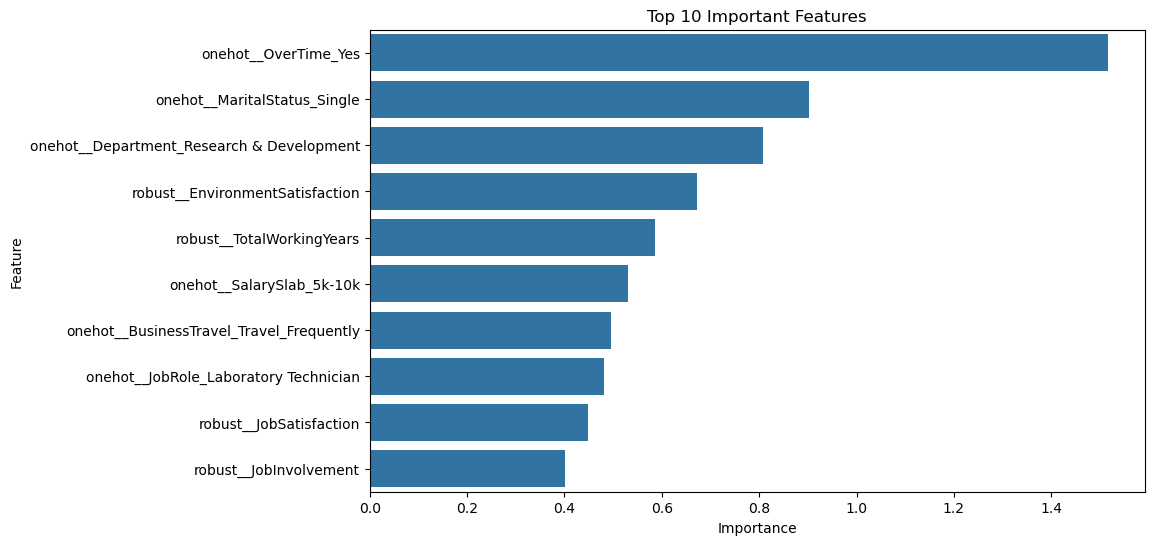

In [59]:
# Get LIME explanation as a list (feature, importance)
lime_results = exp.as_list()

# Sort by impact on False class (ascending)
sorted_lime_results = sorted(lime_results, key=lambda x: x[1])

# Print sorted results
for feature, importance in sorted_lime_results:
    print(f"{feature}: {importance}")

# Get feature importance from Logistic Regression (absolute coefficient values)
logreg = pipe_tune.named_steps['modeling']  # Extract the trained model
coefficients = logreg.coef_[0]  # Coefficients for each feature

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance.head(10))

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'][:10], y=feature_importance['Feature'][:10])
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()



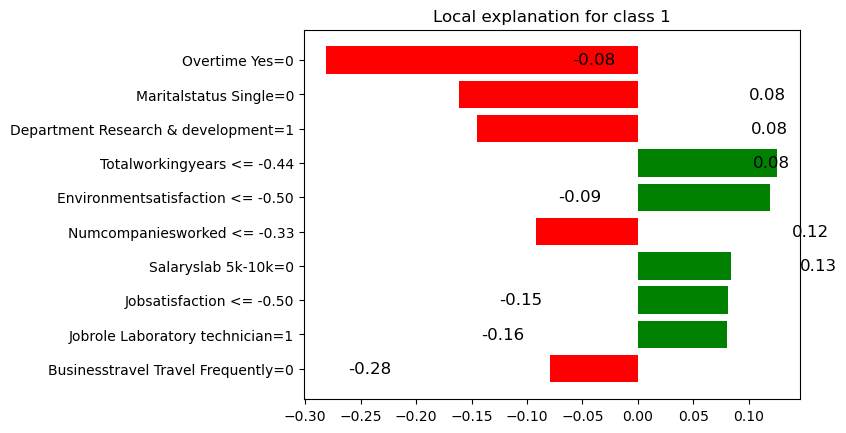

In [60]:
# Plot the LIME explanation
fig = exp.as_pyplot_figure()

# Extract feature names and importance scores
feature_importances = exp.as_list()

# Annotate the plot with the importance scores
for i, (feature, importance) in enumerate(feature_importances):
    plt.text(
        importance + 0.02,  # Offset to the right for better visibility
        i + 0.5,  # Move text slightly upwards
        f"{importance:.2f}",  # Format importance score
        ha="left",  # Align text to the left
        va="center",  # Keep text vertically aligned
        fontsize=12,  # Adjust font size
        color="black"  # Set text color
    )

# Show the plot
plt.show()


Data type of X_test_transform: <class 'numpy.ndarray'>


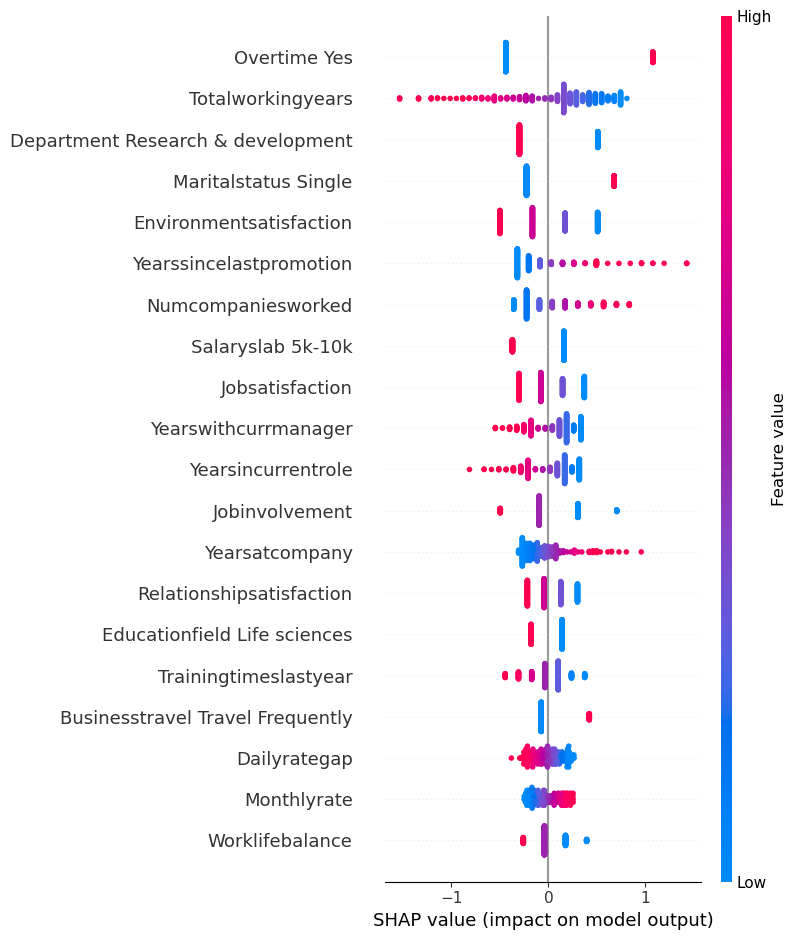

In [61]:


# Extract the best model from the pipeline
best_model = pipe_tune.named_steps['modeling']  # Assuming 'modeling' is the name of the model step

# Transform the test data using the preprocessing steps
X_test_transform = pipe_tune['preprocessing'].transform(X_test)

# Check the data type of X_test_transform
print(f"Data type of X_test_transform: {type(X_test_transform)}")

# If X_test_transform is a sparse matrix, convert it to a dense array
if hasattr(X_test_transform, "toarray"):
    X_test_transform = X_test_transform.toarray()

# If X_test_transform is not a numpy array, convert it to one
if not isinstance(X_test_transform, np.ndarray):
    X_test_transform = np.array(X_test_transform)

# Check for object-type data and convert to numeric if necessary
if X_test_transform.dtype == 'object':
    X_test_transform = pd.DataFrame(X_test_transform).apply(pd.to_numeric, errors='coerce').values

# Get feature names after preprocessing
feature_names = pipe_tune['preprocessing'].get_feature_names_out()

# Initialize SHAP LinearExplainer for Logistic Regression
explainer = shap.LinearExplainer(best_model, X_test_transform, feature_perturbation="interventional")

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_transform)

# Create the beeswarm plot
plt.figure(figsize=(12, 8))  # Adjust size for better readability
shap.summary_plot(shap_values, X_test_transform, feature_names=feature_names_convert)

plt.show()


Key Insights:

- Employees who work overtime are more likely to experience attrition.
- The longer an employee's total working years, the less likely they are to leave.
- Employees in the Research & Development department tend to have lower attrition rates.
- Single employees are more likely to leave compared to those who are married or in a relationship.

## 3.9. Save Model

In [62]:
# Save model

#fit
pipe_tune.fit(X, y)

# save with pickle
pickle.dump(pipe_tune, open('HR Prediction Model.sav', 'wb'))

In [63]:
# Load model
filename = 'HR Prediction Model.sav'
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('pipe_ordinal_robust',
                                                  Pipeline(steps=[('ordinal',
                                                                   OrdinalEncoder(mapping=[{'col': 'AgeGroup',
                                                                                            'data_type': dtype('O'),
                                                                                            'mapping': 55+      1
46-55    2
36-45    3
26-35    4
18-25    5
dtype: int64}])),
                                                                  ('robust',
                                                                   RobustScaler())]),
                                                  ['AgeGroup']),
                                                 ('robust', RobustScaler(),
                                                  ['Age', 'DailyRateGap',
                                                   'DistanceFromHome',
                                                   'Educati...
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['BusinessTravel',
                                                   'Department',
                                                   'EducationField', 'Gender',
                                                   'JobRole', 'MaritalStatus',
                                                   'SalarySlab',
                                                   'OverTime'])])),
                ('resampling',
                 SMOTE(random_state=42, sampling_strategy='minority')),
                ('modeling',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    max_iter=500, penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [64]:
X_test.columns

Index(['Age', 'AgeGroup', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'SalarySlab', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'SalaryGap', 'DailyRateGap'],
      dtype='object')

In [65]:
X_train.columns.shape

(32,)

In [66]:
df.query("EmpID=='RM391'")

EmpID  Age AgeGroup  Attrition BusinessTravel              Department  \
1102  RM391   43    36-45          0  Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1102                12          3  Life Sciences                        1   

     Gender  HourlyRate  JobInvolvement  JobLevel            JobRole  \
1102   Male          59               2         4  Research Director   

      JobSatisfaction MaritalStatus SalarySlab  MonthlyRate  \
1102                2      Divorced    10k-15k         4345   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
1102                   1       No                 11                  3   

      RelationshipSatisfaction  StockOptionLevel  TotalWorkingYears  \
1102                         3                 1                 25   

      TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
1102                      3                3              25   

      YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  \
1102                  10                        3                   9.0   

      SalaryGap  DailyRateGap  
1102    -2034.5         162.5

In [67]:
# Make prediction probabilities for a single instance
y_prob = loaded_model.predict_proba(df.query("EmpID=='RM391'"))[:, 1]

# Apply threshold adjustment (0.54)
y_pred_adjusted = (y_prob > 0.54).astype(int)

# Output adjusted prediction
y_pred_adjusted


array([0])

<hr>

# 3. Categoryze using Unsupervise by 2 Category JobSatisfaction and MonthlyRate

We will try to use Unsupervised KMeans to get RiskLevel and then use it for further modeling

In [68]:
X = df[['JobSatisfaction','MonthlyRate']] #drop cust_id karena unique 
X

JobSatisfaction  MonthlyRate
0                   3        25233
1                   3         9724
2                   2         8059
3                   4        13493
4                   3        13556
...               ...          ...
1468                1         3854
1469                1         2845
1470                1        11924
1471                4        10893
1472                4        20467

[1473 rows x 2 columns]

In [69]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
X_scaled

array([[ 0.24624362,  1.53401273],
       [ 0.24624362, -0.646323  ],
       [-0.6605485 , -0.88039734],
       ...,
       [-1.56734063, -0.33703558],
       [ 1.15303574, -0.48197891],
       [ 1.15303574,  0.86398371]])

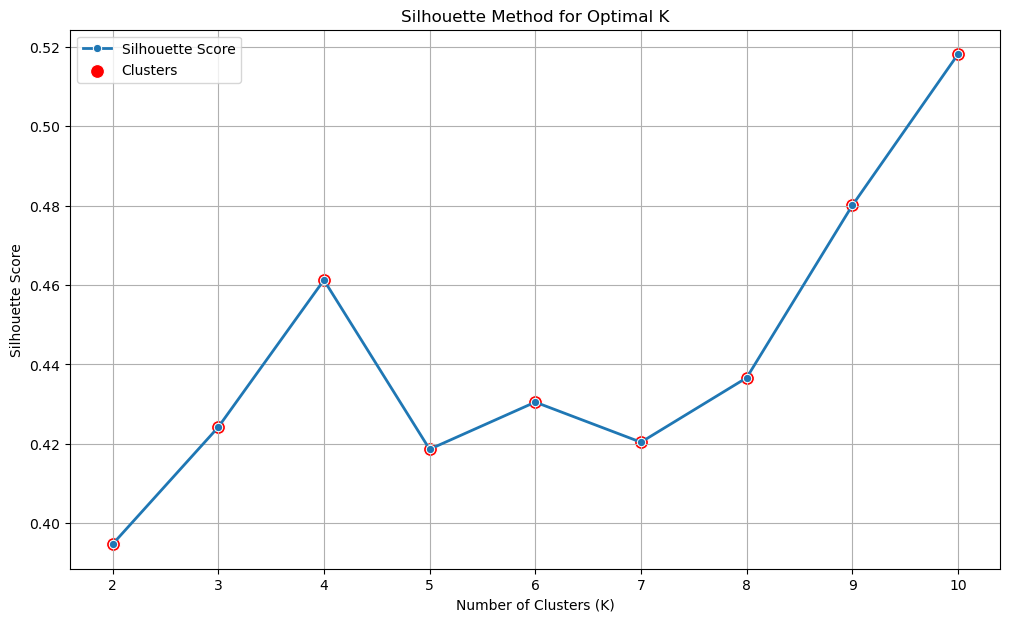

In [70]:
silhouette_scores = []
number_of_cluster = range(2, 11)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state=42)  # Added random_state for consistency
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels, metric='euclidean'))

# Plot Silhouette Scores
plt.figure(figsize=(12, 7))

sns.lineplot(x=number_of_cluster, y=silhouette_scores, marker='o', label="Silhouette Score", linewidth=2)
sns.scatterplot(x=number_of_cluster, y=silhouette_scores, color='red', s=100, label="Clusters")

plt.xticks(number_of_cluster)

plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal K')
plt.legend()
plt.grid(True)

plt.show()


In [71]:
kmeans = KMeans(n_clusters = 10,random_state=42)
kmeans.fit(X_scaled)

KMeans(n_clusters=10, random_state=42)

In [72]:
df['cluster'] = kmeans.labels_

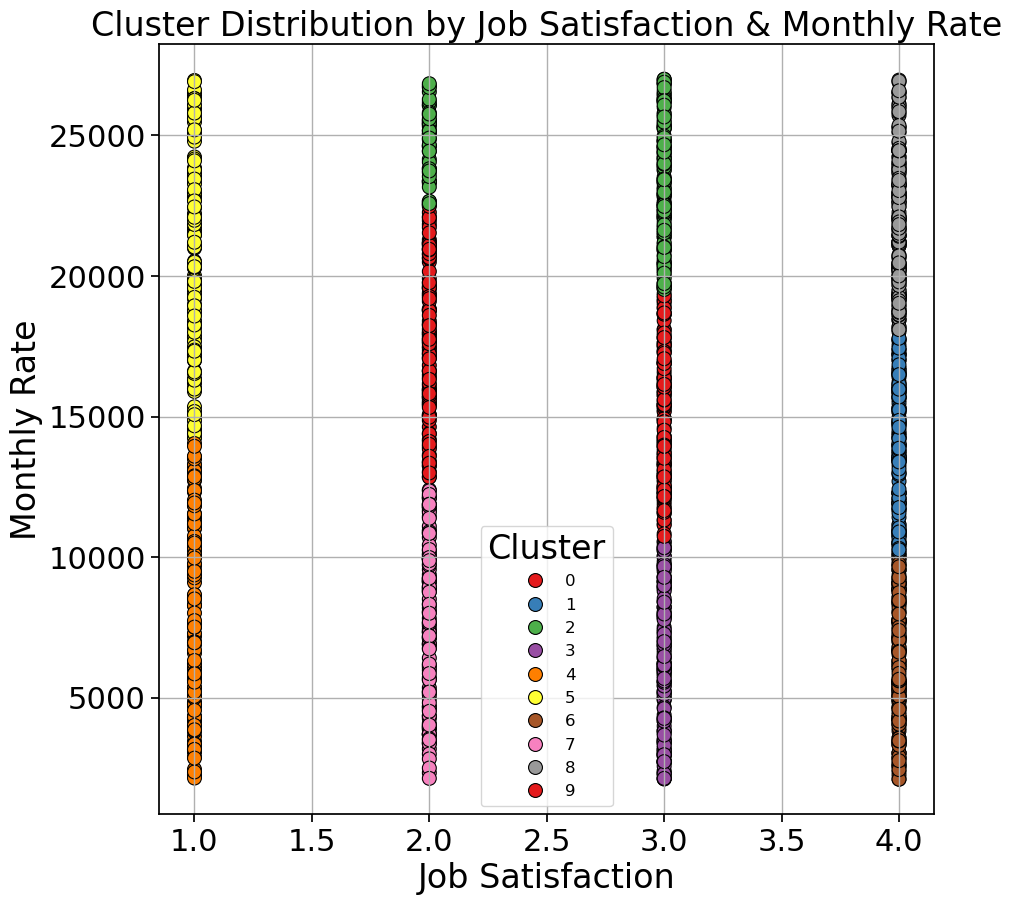

In [73]:
plt.figure(figsize=(10, 10))
sns.set_context(context='notebook', font_scale=2)

# Using "tab10" or "Set1" for high contrast colors
sns.scatterplot(
    x='JobSatisfaction', 
    y='MonthlyRate', 
    hue='cluster',
    data=df,
    palette='Set1',  # High contrast colors
    edgecolor='black',  # Add black edge to improve visibility
    s=100  # Adjust point size
)

plt.xlabel('Job Satisfaction')
plt.ylabel('Monthly Rate')
plt.title('Cluster Distribution by Job Satisfaction & Monthly Rate')

plt.legend(title='Cluster', fontsize=12)
plt.grid(True)
plt.show()


In [74]:
satisfaction_mapping = {
    1: 'Dissatisfied',
    2: 'Neutral',
    3: 'High Satisfaction',
    4: 'Very Satisfied'
}

df_clustered = pd.DataFrame(df.groupby('cluster')['MonthlyRate'].mean())
df_clustered['JobSatisfaction'] = df.groupby('cluster')['JobSatisfaction'].median()
df_clustered = df_clustered.reset_index()
df_clustered['PayCategory'] = pd.qcut(df_clustered['MonthlyRate'], q=3, labels=['Low', 'Mid', 'High'])
df_clustered['Category'] = df_clustered['JobSatisfaction'].map(satisfaction_mapping)
df_clustered['Label'] = df_clustered['PayCategory'].astype(str) + ' - ' + df_clustered['Category']
df_clustered.sort_values(by=['JobSatisfaction','MonthlyRate'],ascending=[True,False])

def categorize_risk(row):
    if row['Category'] == 'Dissatisfied' or (row['PayCategory'] == 'Low' and row['Category'] == 'Neutral'):
        return 'High Risk'
    elif row['Category'] == 'Neutral' or (row['PayCategory'] == 'Mid' and row['Category'] == 'High Satisfaction'):
        return 'Medium Risk'
    else:
        return 'Low Risk'

# Apply the function to create the Risk Level column
df_clustered['RiskLevel'] = df_clustered.apply(categorize_risk, axis=1)

# Sort the values for better visibility
df_clustered = df_clustered.sort_values(by=['JobSatisfaction', 'MonthlyRate'], ascending=[True, False])

# Display the final clustered dataframe
df_clustered



cluster   MonthlyRate  JobSatisfaction PayCategory           Category  \
5        5  20445.611111              1.0        High       Dissatisfied   
4        4   7882.554795              1.0         Low       Dissatisfied   
0        0  17570.053097              2.0        High            Neutral   
7        7   7628.196721              2.0         Low            Neutral   
2        2  23546.494792              3.0        High  High Satisfaction   
9        9  14875.146853              3.0         Mid  High Satisfaction   
3        3   6212.241830              3.0         Low  High Satisfaction   
8        8  21942.956522              4.0        High     Very Satisfied   
1        1  14012.762590              4.0         Mid     Very Satisfied   
6        6   6282.337500              4.0         Low     Very Satisfied   

                      Label    RiskLevel  
5       High - Dissatisfied    High Risk  
4        Low - Dissatisfied    High Risk  
0            High - Neutral  Medium Risk  
7             Low - Neutral    High Risk  
2  High - High Satisfaction     Low Risk  
9   Mid - High Satisfaction  Medium Risk  
3   Low - High Satisfaction     Low Risk  
8     High - Very Satisfied     Low Risk  
1      Mid - Very Satisfied     Low Risk  
6      Low - Very Satisfied     Low Risk

In [75]:
df['cluster'] = df['cluster'].apply(lambda x: df_clustered.loc[df_clustered['cluster'] == x, 'RiskLevel'].values[0])
df

EmpID  Age AgeGroup  Attrition     BusinessTravel  \
0      RM297   18    18-25          1      Travel_Rarely   
1      RM302   18    18-25          0      Travel_Rarely   
2      RM458   18    18-25          1  Travel_Frequently   
3      RM728   18    18-25          0         Non-Travel   
4      RM829   18    18-25          1         Non-Travel   
...      ...  ...      ...        ...                ...   
1468   RM412   60      55+          0      Travel_Rarely   
1469   RM428   60      55+          0  Travel_Frequently   
1470   RM537   60      55+          0      Travel_Rarely   
1471   RM880   60      55+          0      Travel_Rarely   
1472  RM1210   60      55+          0      Travel_Rarely   

                  Department  DistanceFromHome  Education EducationField  \
0     Research & Development                 3          3  Life Sciences   
1                      Sales                10          3        Medical   
2                      Sales                 5          3      Marketing   
3     Research & Development                 5          2  Life Sciences   
4     Research & Development                 8          1        Medical   
...                      ...               ...        ...            ...   
1468  Research & Development                 7          3  Life Sciences   
1469                   Sales                28          3      Marketing   
1470                   Sales                16          4      Marketing   
1471                   Sales                 7          4      Marketing   
1472  Research & Development                 1          4        Medical   

      EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                           3    Male          54               3         1   
1                           4  Female          69               2         1   
2                           2    Male          69               3         1   
3                           2    Male          73               3         1   
4                           3    Male          80               3         1   
...                       ...     ...         ...             ...       ...   
1468                        1  Female          41               3         5   
1469                        3  Female          80               2         3   
1470                        1    Male          84               3         2   
1471                        2    Male          52               4         2   
1472                        3    Male          92               1         3   

                        JobRole  JobSatisfaction MaritalStatus SalarySlab  \
0         Laboratory Technician                3        Single    Upto 5k   
1          Sales Representative                3        Single    Upto 5k   
2          Sales Representative                2        Single    Upto 5k   
3            Research Scientist                4        Single    Upto 5k   
4         Laboratory Technician                3        Single    Upto 5k   
...                         ...              ...           ...        ...   
1468                    Manager                1       Married       15k+   
1469            Sales Executive                1       Married    10k-15k   
1470            Sales Executive                1        Single     5k-10k   
1471            Sales Executive                4      Divorced     5k-10k   
1472  Healthcare Representative                4      Divorced    10k-15k   

      MonthlyRate  NumCompaniesWorked OverTime  PercentSalaryHike  \
0           25233                   1       No                 13   
1            9724                   1       No                 12   
2            8059                   1      Yes                 14   
3           13493                   1       No                 15   
4           13556                   1       No                 12   
...           ...                 ...      ...                ...   
1468         385

## 3.1. Modeling After Clustering

In [76]:
X = df.drop(columns=['EmpID','Attrition'])
y = df['Attrition']

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
X,
y,test_size=0.2,
random_state=0,
stratify=y
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1178, 33), (295, 33), (1178,), (295,))

In [78]:
One_Hot = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','SalarySlab','OverTime']

Ordinal = ['AgeGroup','cluster']

Robust = ['Age','DailyRateGap','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
          'JobInvolvement','JobLevel','JobSatisfaction','SalaryGap','MonthlyRate','NumCompaniesWorked',
          'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
          'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']





ordinal_encoding = [
    {  # Ranking: higher values indicate higher churn risk
        'col': 'AgeGroup',
        'mapping': {
            '55+': 1,
            '46-55': 2,
            '36-45': 3,
            '26-35': 4,
            '18-25' : 5
        }
    },
        {  # Ranking: higher values indicate higher churn risk
        'col': 'cluster',
        'mapping': {
            'Low Risk': 1,
            'Medium Risk': 2,
            'High Risk' : 3
        }
    }
]

pipe_ordinal_robust = Pipeline([
    ('ordinal',OrdinalEncoder(mapping=ordinal_encoding)),
    ('robust',RobustScaler())
])


transformer = ColumnTransformer([
    ('pipe_ordinal_robust', pipe_ordinal_robust, Ordinal),
    ('robust', RobustScaler(), Robust),
    ('onehot', OneHotEncoder(drop='first',handle_unknown='ignore'),
     One_Hot)
])


In [79]:
X_train

Age AgeGroup     BusinessTravel              Department  \
1273   48    46-55  Travel_Frequently                   Sales   
680    35    26-35      Travel_Rarely  Research & Development   
1303   50    46-55  Travel_Frequently                   Sales   
63     23    18-25      Travel_Rarely  Research & Development   
222    28    26-35      Travel_Rarely  Research & Development   
...   ...      ...                ...                     ...   
1263   48    46-55      Travel_Rarely  Research & Development   
26     20    18-25      Travel_Rarely                   Sales   
564    33    26-35      Travel_Rarely                   Sales   
1236   47    46-55      Travel_Rarely  Research & Development   
637    34    26-35      Travel_Rarely  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
1273                 7          2        Medical                        4   
680                  7          3          Other                        3   
1303                12          3      Marketing                        3   
63                   1          2  Life Sciences                        4   
222                  1          2  Life Sciences                        1   
...                ...        ...            ...                      ...   
1263                 6          3  Life Sciences                        1   
26                   2          3        Medical                        3   
564                  2          4        Medical                        4   
1236                 2          2        Medical                        1   
637                  5          2        Medical                        2   

      Gender  HourlyRate  JobInvolvement  JobLevel                    JobRole  \
1273  Female          95               3         1       Sales Representative   
680     Male          59               3         3     Manufacturing Director   
1303  Female          77               3         3            Sales Executive   
63      Male          47               3         1         Research Scientist   
222   Female          67               1         1         Research Scientist   
...      ...         ...             ...       ...                        ...   
1263    Male          97               2         2  Healthcare Representative   
26    Female          31               3         1       Sales Representative   
564     Male          93               3         2            Sales Executive   
1236  Female          65               3         2     Manufacturing Director   
637     Male          57               2         2      Laboratory Technician   

      JobSatisfaction MaritalStatus SalarySlab  MonthlyRate  \
1273                3       Married    Upto 5k        11740   
680                 3        Single    10k-15k        18869   
1303                4        Single     5k-10k         6645   
63                  3       Married    Upto 5k        16901   
222                 2        Single    Upto 5k         3872   
...               ...           ...        ...          ...   
1263                3        Single    Upto 5k        13119   
26                  3        Single    Upto 5k        13251   
564                 4      Divorced     5k-10k         3921   
1236                4      Divorced     5k-10k         7389   
637                 4       Married    Upto 5k        11912   

      NumCompaniesWorked OverTime  PercentSalaryHike  PerformanceRating  \
1273                   2      Yes                 11                  3   
680                    3       No                 21                  4   
1303                   4       No                 11                  3   
63                     1       No                 22                  4   
222                    7      Yes                 13                  3   
...                  ...      ...                ...                ...   
1263                   2       No            

In [80]:
transformed_array = transformer.fit_transform(X_train)
transformed_array

array([[-1.        ,  0.5       ,  0.92307692, ...,  0.        ,
         1.        ,  1.        ],
       [ 1.        ,  0.5       , -0.07692308, ...,  0.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  1.07692308, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 1.        ,  0.        , -0.23076923, ...,  1.        ,
         0.        ,  0.        ],
       [-1.        ,  0.        ,  0.84615385, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.        ,  0.        , -0.15384615, ...,  0.        ,
         1.        ,  0.        ]])

In [81]:
# Define classifiers
log_reg = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
extra_trees = ExtraTreesClassifier(random_state=42)
gradient_boosting = GradientBoostingClassifier(random_state=42)
xgboost = XGBClassifier(random_state=42)
lightgbm = LGBMClassifier(random_state=42,verbose=-1)
catboost = CatBoostClassifier(random_state=42, verbose=0)
knn = KNeighborsClassifier()

# Define multiple F-beta scorers
scorers = {
    "f2_score": make_scorer(fbeta_score, beta=2),
    "f1.5_score": make_scorer(fbeta_score, beta=1.5),
    "f1.8_score": make_scorer(fbeta_score, beta=1.8),
    "accuracy": make_scorer(accuracy_score),  # ✅ Fixed accuracy_score
    "recall": make_scorer(recall_score)  # ✅ Added recall
}

# Define models (including Voting Classifier)
models = {
    "Logistic Regression": log_reg,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "Extra Trees": extra_trees,
    "Gradient Boosting": gradient_boosting,
    "XGBoost": xgboost,
    "LightGBM": lightgbm,
    "CatBoost": catboost,
    "KNN": knn,
    "Voting Classifier": VotingClassifier(estimators=[
        ('clf1', log_reg),
        ('clf2', random_forest),
        ('clf3', lightgbm),
        ('clf4', catboost),
        ('clf5', xgboost)
    ])
}

# Store results
results = []

# Loop through each model
for model_name, model in models.items():
    # Create pipeline
    pipe = Pipeline([
        ('scaling', transformer),
        ('modeling', model)
    ])

    # Perform cross-validation
    cv_results = cross_validate(pipe, X_train, y_train, cv=5, scoring=scorers)

    # Store results
     # Store results
    results.append({
        "Model": model_name,
        "F2 Mean": cv_results["test_f2_score"].mean(),
        "F2 Std": cv_results["test_f2_score"].std(),
        "F1.5 Mean": cv_results["test_f1.5_score"].mean(),
        "F1.5 Std": cv_results["test_f1.5_score"].std(),
        "F1.8 Mean": cv_results["test_f1.8_score"].mean(),
        "F1.8 Std": cv_results["test_f1.8_score"].std(),
        "Accuracy Mean": cv_results["test_accuracy"].mean(),
        "Accuracy Std": cv_results["test_accuracy"].std(),
        "Recall Mean": cv_results["test_recall"].mean(),
        "Recall Std": cv_results["test_recall"].std()
    })

# Convert to DataFrame
df_results = pd.DataFrame(results).sort_values(by="F1.5 Mean", ascending=False)

# Print results
df_results


Model   F2 Mean    F2 Std  F1.5 Mean  F1.5 Std  F1.8 Mean  \
0  Logistic Regression  0.433540  0.029494   0.454144  0.028990   0.440180   
4    Gradient Boosting  0.346048  0.026507   0.368984  0.023094   0.353342   
1        Decision Tree  0.355438  0.061277   0.351705  0.060012   0.354164   
5              XGBoost  0.317865  0.037500   0.339605  0.039282   0.324779   
6             LightGBM  0.294058  0.034552   0.318115  0.037202   0.301649   
9    Voting Classifier  0.268915  0.022408   0.294511  0.024366   0.276924   
7             CatBoost  0.252294  0.028609   0.277635  0.030492   0.260195   
3          Extra Trees  0.227857  0.029254   0.250917  0.030772   0.235040   
2        Random Forest  0.137689  0.081891   0.153346  0.090356   0.142530   
8                  KNN  0.125679  0.051578   0.140351  0.056820   0.130209   

   F1.8 Std  Accuracy Mean  Accuracy Std  Recall Mean  Recall Std  
0  0.029305       0.869282      0.008463     0.400000    0.030689  
4  0.025477       0.861630      0.008297     0.310526    0.030689  
1  0.060783       0.777533      0.028805     0.363158    0.065314  
5  0.038053       0.854814      0.013261     0.284211    0.034912  
6  0.035379       0.859935      0.011009     0.257895    0.030689  
9  0.023010       0.864169      0.008173     0.231579    0.019693  
7  0.029199       0.864172      0.008539     0.215789    0.025784  
3  0.029737       0.858237      0.010205     0.194737    0.026837  
2  0.084522       0.851442      0.009680     0.115789    0.069824  
8  0.053212       0.843801      0.011562     0.105263    0.044035

Logistic Regression CLASSIFIER PIPELINE BEFORE TUNING
CV F1_5: [0.4005 0.4581 0.4535 0.4749 0.4837]
CV F1_5 Mean: 0.4541
CV F1_5 Std: 0.029
Train F1_5: 0.5066
Test F1_5: 0.522


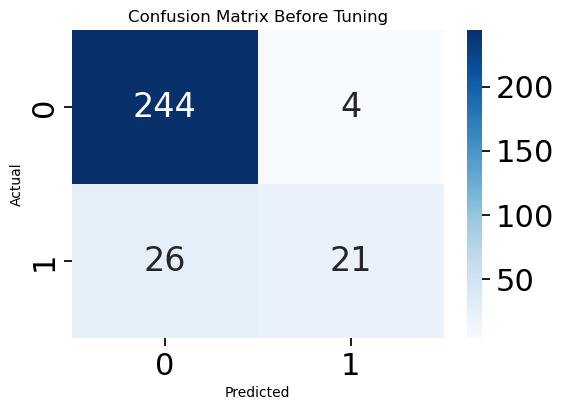

In [82]:
# Define F1.5 scorer
f1_5_scorer = make_scorer(fbeta_score, beta=1.5)
# f1_8_scorer = make_scorer(fbeta_score, beta=1.8)


# Define Pipeline
pipe = Pipeline([
    ('scaling', transformer),
    ('modeling', log_reg)
])

# Define F2-score for evaluation
f2_scorer = make_scorer(fbeta_score, beta=2)  # ✅ Use F2-score

# Perform cross-validation using F2-score
cv_score = cross_val_score(
    pipe, 
    X_train, 
    y_train, 
    cv=5,
    groups=X_train.index,
    scoring=f1_5_scorer  # ✅ Use F2-score
)

# Fit the model
pipe.fit(X_train, y_train)

# Predict on test set
y_pred = pipe.predict(X_test)

# Compute F2-score for train and test sets
f1_5_train = fbeta_score(y_train, pipe.predict(X_train), beta=1.5)
f1_5_test = fbeta_score(y_test, y_pred, beta=1.5)

# Print results
print("Logistic Regression CLASSIFIER PIPELINE BEFORE TUNING")
print(f"CV F1_5: {np.round(cv_score, 4)}")
print("CV F1_5 Mean:", np.mean(cv_score).round(4))
print("CV F1_5 Std:", np.std(cv_score).round(4))
print("Train F1_5:", f1_5_train.round(4))
print("Test F1_5:", f1_5_test.round(4))

# Set figure size before plotting
plt.figure(figsize=(6, 4))  # Adjust size as needed
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cmap="Blues")

# Add titles and labels
plt.title("Confusion Matrix Before Tuning", fontsize=12)
plt.xlabel("Predicted", fontsize=10)
plt.ylabel("Actual", fontsize=10)

# Show the plot
plt.show()


                                     Feature  Importance
48                      onehot__OverTime_Yes    1.709923
25  onehot__BusinessTravel_Travel_Frequently    1.385151
44              onehot__MaritalStatus_Single    1.046962
46                 onehot__SalarySlab_5k-10k    0.983163
36     onehot__JobRole_Laboratory Technician    0.963655
39         onehot__JobRole_Research Director    0.848149
42      onehot__JobRole_Sales Representative    0.834205
6            robust__EnvironmentSatisfaction    0.805874
18                 robust__TotalWorkingYears    0.685173
47                onehot__SalarySlab_Upto 5k    0.641911


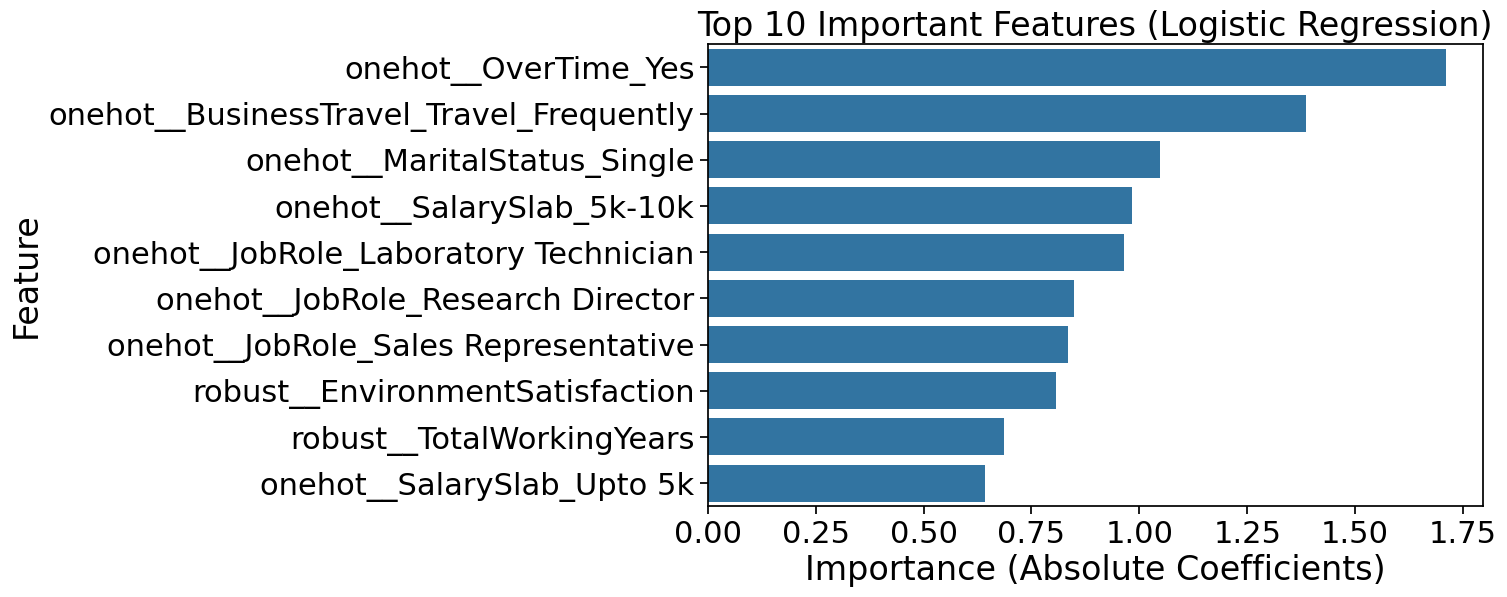

In [83]:
# Get feature names from transformer
feature_names = transformer.get_feature_names_out()

# Get coefficients from logistic regression
coefficients = pipe.named_steps['modeling'].coef_[0]  # Extract coefficients

# Create a DataFrame for better readability
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': np.abs(coefficients)})  # Take absolute values

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the top 10 features
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance['Importance'][:10], y=feature_importance['Feature'][:10])
plt.title('Top 10 Important Features (Logistic Regression)')
plt.xlabel('Importance (Absolute Coefficients)')
plt.ylabel('Feature')
plt.show()


In [84]:
# Define resampling techniques
resampling_methods = {
    "none": None,
    "undersampling": RandomUnderSampler(random_state=42),
    "oversampling": RandomOverSampler(random_state=42),
    "smote": SMOTE(random_state=42, sampling_strategy='minority'),
    "nearmiss": NearMiss(sampling_strategy='majority')
}

# Define Logistic Regression model
model = LogisticRegression(random_state=42, solver='liblinear', max_iter=500)

# Define hyperparameter space for Logistic Regression
hyperparam = {
    'resampling': list(resampling_methods.values()),  # Add resampling as a hyperparameter
    'modeling__C': [0.001, 0.01, 0.1, 1, 10, 100],  
    'modeling__penalty': ['l1', 'l2'],  
    'modeling__solver': ['liblinear', 'saga'],  
    'modeling__max_iter': [500, 1000],  # 500 is a good starting point
    'modeling__class_weight': [None, 'balanced'],  
}

# Define pipeline (with placeholder for resampling)
Pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('resampling', None),  # Placeholder step
    ('modeling', model)
])

# Define F2-score for optimization
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define RandomizedSearchCV
randomsearch = RandomizedSearchCV(
    estimator=Pipe_model,
    param_distributions=hyperparam,
    n_iter=20,  
    scoring={'f2': f2_scorer},
    refit='f2',
    cv=5,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV
randomsearch.fit(X_train, y_train)

# Best model parameters
print("Best Parameters:", randomsearch.best_params_)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best Parameters: {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l1', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 0.1}


In [85]:
# Show top 5 best models
pd.DataFrame(randomsearch.cv_results_).sort_values(by='rank_test_f2', ascending=True).head(5)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
19       0.020872      0.002641         0.005121        0.002139   
7        0.158747      0.007970         0.004046        0.000203   
5        0.019495      0.003877         0.005985        0.002887   
6        0.270516      0.047309         0.003919        0.000257   
15       0.018977      0.003239         0.007989        0.005874   

                                        param_resampling  \
19  SMOTE(random_state=42, sampling_strategy='minority')   
7                                                   None   
5                     RandomOverSampler(random_state=42)   
6   SMOTE(random_state=42, sampling_strategy='minority')   
15  SMOTE(random_state=42, sampling_strategy='minority')   

   param_modeling__solver param_modeling__penalty  param_modeling__max_iter  \
19              liblinear                      l1                       500   
7                    saga                      l2                       500   
5               liblinear                      l2                       500   
6                    saga                      l1                      1000   
15              liblinear                      l2                       500   

   param_modeling__class_weight  param_modeling__C  \
19                     balanced               0.10   
7                      balanced              10.00   
5                          None               0.10   
6                          None               1.00   
15                         None               0.01   

                                                                                                                                                                                                                   params  \
19  {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l1', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 0.1}   
7                                                         {'resampling': None, 'modeling__solver': 'saga', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': 'balanced', 'modeling__C': 10}   
5                           {'resampling': RandomOverSampler(random_state=42), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': None, 'modeling__C': 0.1}   
6               {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'saga', 'modeling__penalty': 'l1', 'modeling__max_iter': 1000, 'modeling__class_weight': None, 'modeling__C': 1}   
15       {'resampling': SMOTE(random_state=42, sampling_strategy='minority'), 'modeling__solver': 'liblinear', 'modeling__penalty': 'l2', 'modeling__max_iter': 500, 'modeling__class_weight': None, 'modeling__C': 0.01}   

    split0_test_f2  split1_test_f2  split2_test_f2  split3_test_f2  \
19        0.641593        0.603448        0.611354        0.622120   
7         0.608108        0.648536        0.635965        0.588235   
5         0.550661        0.606061        0.643777        0.636364   
6         0.639269        0.655022        0.616740        0.581395   
15        0.616740        0.567227        0.609756        0.585774   

    split4_test_f2  mean_test_f2  std_test_f2  rank_test_f2  
19        0.649351      0.625573     0.017468             1  
7         0.643777      0.624924     0.023081             2  
5         0.656780      0.618728     0.037895             3  
6         0.585586      0.615602     0.028936             4  
15        0.679012      0.611702     0.037974             5

Logistic Regression CLASSIFIER PIPELINE AFTER TUNING
CV f1_5: [0.6416 0.6034 0.6114 0.6221 0.6494]
CV f1_5 Mean: 0.6256
CV f1_5 Std: 0.0175
Train f1_5: 0.6286
Test f1_5: 0.596


<Axes: >

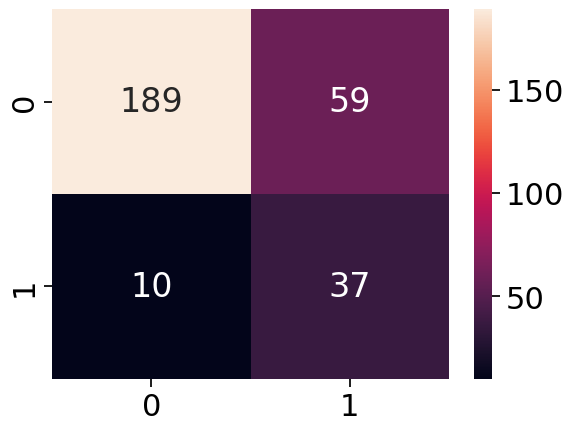

In [86]:
# Use the best model from tuning directly (it already includes preprocessing)
pipe_tune = randomsearch.best_estimator_

# Train the tuned model
pipe_tune.fit(X_train, y_train)

# Perform cross-validation scoring
cv_score = cross_val_score(
    pipe_tune, 
    X_train, 
    y_train, 
    cv=5,
    scoring=f2_scorer  # Use F1.5 scorer
)

# Predict on test set
y_pred_tune = pipe_tune.predict(X_test)

# Calculate F1.5-score
f1_5_train = fbeta_score(y_train, pipe_tune.predict(X_train), beta=1.5)
f1_5_test = fbeta_score(y_test, y_pred_tune, beta=1.5)

# Print results
print("Logistic Regression CLASSIFIER PIPELINE AFTER TUNING")
print(f"CV f1_5: {np.round(cv_score, 4)}")
print("CV f1_5 Mean:", np.mean(cv_score).round(4))
print("CV f1_5 Std:", np.std(cv_score).round(4))
print("Train f1_5:", f1_5_train.round(4))
print("Test f1_5:", f1_5_test.round(4))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='g')


## 3.2. Cost Evaluation

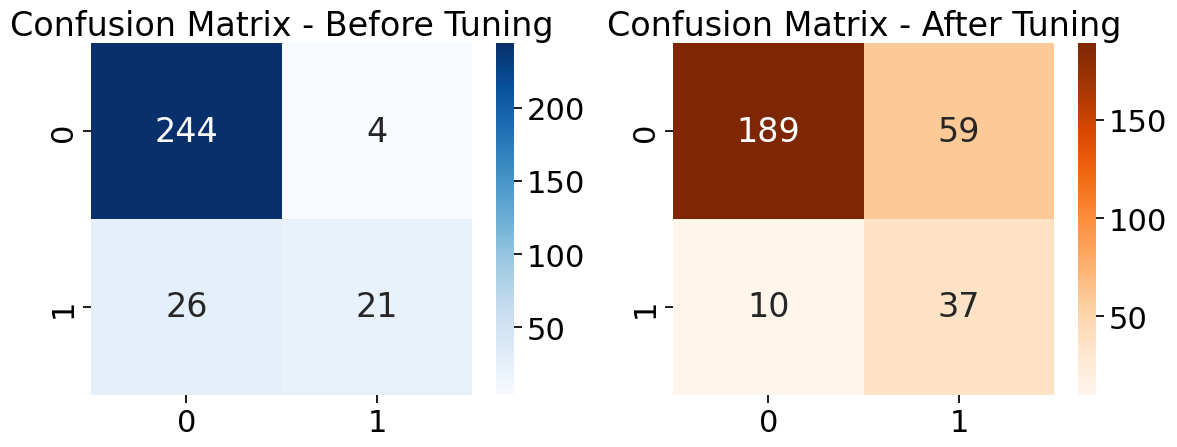

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_tune), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [88]:
TN = confusion_matrix(y_test, y_pred)[0][0]
FN = confusion_matrix(y_test, y_pred)[1][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
TP = confusion_matrix(y_test, y_pred)[1][1]

TN_after = confusion_matrix(y_test, y_pred_tune)[0][0]
FN_after = confusion_matrix(y_test, y_pred_tune)[1][0]
FP_after = confusion_matrix(y_test, y_pred_tune)[0][1]
TP_after = confusion_matrix(y_test, y_pred_tune)[1][1]
print(f"""
    Cost Reduction Base Model :{FN*40000+FP*15000}

    Cost Reduction Tuned Model :{FN_after*40000+FP_after*15000}
    
    Company menghemat {(FN_after*40000+FP_after*15000)-(FN*40000+FP*15000)}
      
      """)

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_tune))


    Cost Reduction Base Model :1100000

    Cost Reduction Tuned Model :1285000
    
    Company menghemat 185000
      
      
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       248
           1       0.84      0.45      0.58        47

    accuracy                           0.90       295
   macro avg       0.87      0.72      0.76       295
weighted avg       0.89      0.90      0.88       295

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       248
           1       0.39      0.79      0.52        47

    accuracy                           0.77       295
   macro avg       0.67      0.77      0.68       295
weighted avg       0.86      0.77      0.79       295



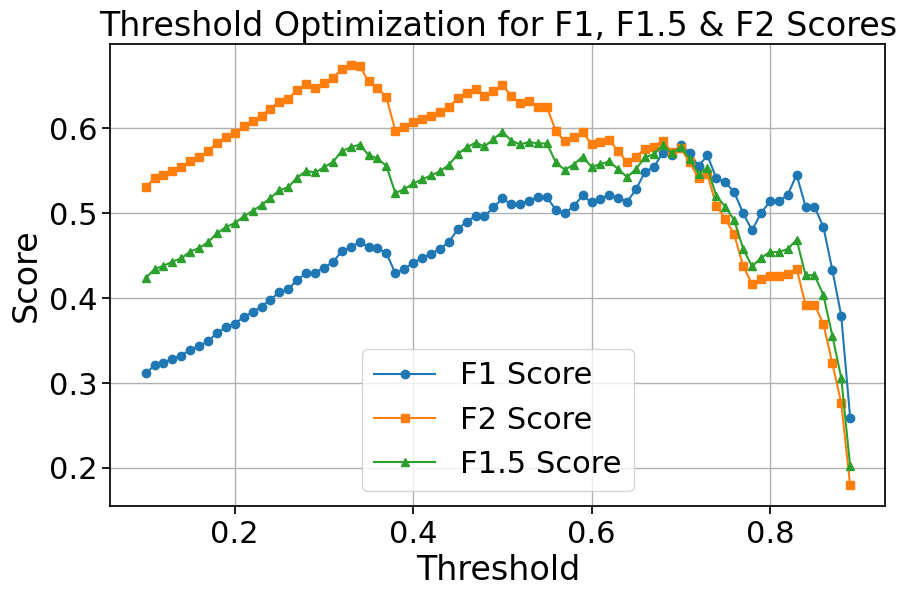

Best Threshold for F1.5 Score: 0.50
Confusion Matrix:
 [[189  59]
 [ 10  37]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85       248
           1       0.39      0.79      0.52        47

    accuracy                           0.77       295
   macro avg       0.67      0.77      0.68       295
weighted avg       0.86      0.77      0.79       295



In [89]:


# Fit the pipeline model
pipe_tune.fit(X_train, y_train)

# Predict probabilities from the trained model
y_prob = pipe_tune.predict_proba(X_test)[:, 1]

# Define a range of threshold values
thresholds = np.arange(0.1, 0.9, 0.01)

# Store scores for each threshold
f1_scores = []
f2_scores = []
f1_5_scores = []

for threshold in thresholds:
    y_pred = (y_prob > threshold).astype(int)
    
    f1_scores.append(f1_score(y_test, y_pred))
    f2_scores.append(fbeta_score(y_test, y_pred, beta=2))
    f1_5_scores.append(fbeta_score(y_test, y_pred, beta=1.5))

# Compute precision and recall for all possible thresholds
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_prob)

# Plot F1, F1.5, and F2 scores vs. Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, f2_scores, label='F2 Score', marker='s')
plt.plot(thresholds, f1_5_scores, label='F1.5 Score', marker='^')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Optimization for F1, F1.5 & F2 Scores')
plt.legend()
plt.grid(True)
plt.show()

# Find the best threshold based on the highest F1.5-score
best_threshold_f1_5 = thresholds[np.argmax(f1_5_scores)]
print(f"Best Threshold for F1.5 Score: {best_threshold_f1_5:.2f}")

# Apply the best threshold
y_pred_adjusted = (y_prob > best_threshold_f1_5).astype(int)

# Evaluate performance
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))


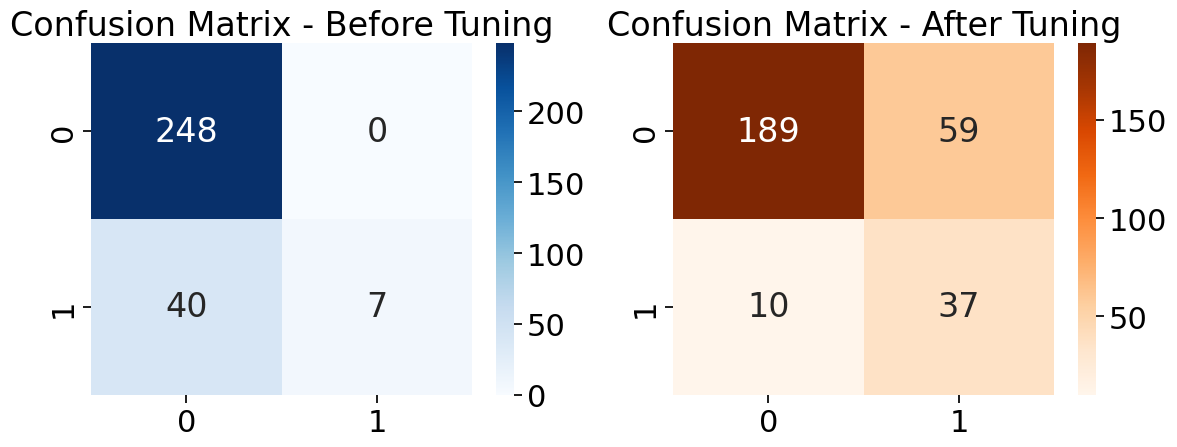

In [90]:
pipe_tune.fit(X_train, y_train)

y_pred_adjusted = (pipe_tune.predict_proba(X_test)[:, 1] > 0.5 ).astype(int)
y_pred_adjusted

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Confusion Matrix Before Tuning
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', ax=axes[0], cmap='Blues')
axes[0].set_title("Confusion Matrix - Before Tuning")

# Confusion Matrix After Tuning
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='g', ax=axes[1], cmap='Oranges')
axes[1].set_title("Confusion Matrix - After Tuning")

plt.tight_layout()
plt.show()

In [91]:
TN = confusion_matrix(y_test, y_pred)[0][0]
FN = confusion_matrix(y_test, y_pred)[1][0]
FP = confusion_matrix(y_test, y_pred)[0][1]
TP = confusion_matrix(y_test, y_pred)[1][1]

TN_after = confusion_matrix(y_test, y_pred_adjusted)[0][0]
FN_after = confusion_matrix(y_test, y_pred_adjusted)[1][0]
FP_after = confusion_matrix(y_test, y_pred_adjusted)[0][1]
TP_after = confusion_matrix(y_test, y_pred_adjusted)[1][1]
print(f"""
    Cost Reduction Base Model :{FN*40000+FP*15000}

    Cost Reduction Tuned Model :{FN_after*40000+FP_after*15000}
    
    Company menghemat {(FN_after*40000+FP_after*15000)-(FN*40000+FP*15000)}
      
      """)

print(classification_report(y_test, y_pred))
print(classification_report(y_test, y_pred_adjusted))


    Cost Reduction Base Model :1600000

    Cost Reduction Tuned Model :1285000
    
    Company menghemat -315000
      
      
              precision    recall  f1-score   support

           0       0.86      1.00      0.93       248
           1       1.00      0.15      0.26        47

    accuracy                           0.86       295
   macro avg       0.93      0.57      0.59       295
weighted avg       0.88      0.86      0.82       295

              precision    recall  f1-score   support

           0       0.95      0.76      0.85       248
           1       0.39      0.79      0.52        47

    accuracy                           0.77       295
   macro avg       0.67      0.77      0.68       295
weighted avg       0.86      0.77      0.79       295



As we can see, adding unsupervised categorization did not improve the model's performance. Therefore, we will use it solely for labeling, helping us identify which rows to focus on.